In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadstat 
from scipy import stats
from sklearn.cluster import KMeans

# Informe Final

## Situación Problemática
La pandemia impactó de muchas maneras Guatemala, especialmente en los mismo hogares, para mucha gente el trabajo fuera de casa era su mejor rutina para mantener un matrimnio estable, es por eso que se desea observar si la cantidad de divorcios han cambiado significativamente desde la pandemia.

## Problema científico
Observar si la cantidad de divorcios a aumentado significativamente en los últimos 10 años, enfocandose en la época posterior a la pandemia del COVID-19.

## Objetivos
### Objetivo General
Analizar la evolución de la tasa de divorcios en los últimos 10 años, con énfasis en el periodo posterior a la pandemia del COVID-19, para determinar si ha habido un aumento significativo.
### Objetivos específicos
* Comparar las tasas de divorcio antes y después de la pandemia del COVID-19 para identificar posibles variaciones significativas.
* Examinar los factores sociales, económicos y emocionales que podrían haber influido en el incremento o disminución de los divorcios tras la pandemia.

## Descripción de los datos

El conjunto de datos analizado contiene información detallada sobre los registros de divorcios ocurridos en un período específico. Cuenta con un total de 5,575 observaciones y 18 variables, las cuales se dividen en 14 numéricas y 4 categóricas. Estas variables incluyen datos sociodemográficos de los cónyuges, así como información sobre la fecha y lugar de ocurrencia del divorcio.

En cuanto a la distribución de los tipos de datos, se observa que las variables numéricas están representadas en formato float64. Sin embargo, algunas de ellas, como DEPREG, MESREG y AÑOREG, corresponden a identificadores de departamento, mes y año, por lo que sería recomendable convertirlas a formato entero (int64) para mejorar la coherencia en el análisis.

Por otro lado, existen cuatro variables categóricas: MUPREG (Municipio de registro), MUPOCU (Municipio de ocurrencia), CIUOHOM (Ocupación del esposo) y CIUOMUJ (Ocupación de la esposa). Estas variables contienen datos en formato object, lo que indica que pueden tener valores de texto o códigos. Es posible que dentro de estas variables existan valores como "IGNORADO" o NaN, lo que podría influir en el análisis si hay una cantidad significativa de datos faltantes.

Desde un punto de vista descriptivo, este dataset ofrece una gran cantidad de información relevante para analizar tendencias en los divorcios. Por ejemplo, las variables DIAOCU, MESOCU y AÑOREG permiten estudiar la distribución temporal de los divorcios, mientras que EDADHOM y EDADMUJ pueden ser utilizadas para determinar la edad promedio de los cónyuges al momento del divorcio. Además, la información sobre escolaridad (ESCHOM y ESCMUJ), nacionalidad (NACHOM y NACMUJ) y ocupación (CIUOHOM y CIUOMUJ) brinda la posibilidad de analizar diferencias en los patrones de divorcio según el perfil sociodemográfico de las personas involucradas.

Otro aspecto a considerar es la normalización de datos. Es importante verificar si los valores de las edades y los códigos de escolaridad o nacionalidad siguen un formato homogéneo. Además, se recomienda realizar un análisis de valores nulos para identificar posibles inconsistencias o datos faltantes que puedan afectar la interpretación de los resultados.


## Análisis exploratorio


In [173]:
file_path1 = "C:\\Users\\javie\\Documents\\UVG\\Cuarto año\\Primer Semestre\\Mineria\\Bases_P3_Mineria\\div_2014.sav"
data_set, meta = pyreadstat.read_sav(file_path1)
print("Columnas del dataset: ", data_set.columns)


Columnas del dataset:  Index(['DEPREG', 'MUPREG', 'MESREG', 'AÑOREG', 'DIAOCU', 'MESOCU', 'DEPOCU',
       'MUPOCU', 'EDADHOM', 'EDADMUJ', 'PUEHOM', 'PUEMUJ', 'NACHOM', 'NACMUJ',
       'ESCHOM', 'ESCMUJ', 'CIUOHOM', 'CIUOMUJ'],
      dtype='object')


In [174]:
_, meta = pyreadstat.read_sav(file_path1, metadataonly=True)

print("Columnas disponibles:", meta.column_names)
print("Descripciones:", meta.column_labels)

Columnas disponibles: ['DEPREG', 'MUPREG', 'MESREG', 'AÑOREG', 'DIAOCU', 'MESOCU', 'DEPOCU', 'MUPOCU', 'EDADHOM', 'EDADMUJ', 'PUEHOM', 'PUEMUJ', 'NACHOM', 'NACMUJ', 'ESCHOM', 'ESCMUJ', 'CIUOHOM', 'CIUOMUJ']
Descripciones: ['Departamento de registro', 'Municipio de registro', 'Mes de registro', 'Año de registro', 'Dia de ocurrencia', 'Mes de ocurrencia', 'Departamento de ocurrencia', 'Municipio de ocurrencia', 'Edad del hombre', 'Edad de la mujer', 'Pueblo de pertenencia del hombre', 'Pueblo de pertenencia de la mujer', 'Nacionalidad del hombre', 'Nacionalidad de la mujer', 'Escolaridad del hombre', 'Escolaridad de la mujer', 'Ocupación (Subgrupos CIUO-08) del hombre', 'Ocupación (Subgrupos CIUO-08) de la mujer']


### Explorar un poco los datos que tienen

In [175]:
data_set, _ = pyreadstat.read_sav(file_path1, row_limit=5)
print(data_set)


   DEPREG MUPREG  MESREG  AÑOREG  DIAOCU  MESOCU  DEPOCU MUPOCU  EDADHOM  \
0    19.0   1901     7.0  2014.0     6.0     6.0    19.0   1901    999.0   
1    10.0   1001     4.0  2014.0    10.0     3.0    10.0   1001    999.0   
2     1.0   0101     9.0  2014.0     4.0     8.0     3.0   0301    999.0   
3     3.0   0309     1.0  2015.0     7.0     8.0     3.0   0309     30.0   
4    10.0   1001     5.0  2014.0     4.0     4.0    10.0   1001    999.0   

   EDADMUJ  PUEHOM  PUEMUJ  NACHOM  NACMUJ  ESCHOM  ESCMUJ   CIUOHOM   CIUOMUJ  
0    999.0     9.0     9.0    76.0   320.0     9.0     9.0        34      NEOG  
1    999.0     9.0     9.0    76.0   320.0     9.0     9.0  IGNORADO  IGNORADO  
2    999.0     4.0     4.0    76.0   320.0     9.0     9.0  IGNORADO  IGNORADO  
3     27.0     9.0     9.0   124.0   320.0     1.0     1.0        52      NEOG  
4    999.0     9.0     9.0   156.0   320.0     9.0     9.0        52      NEOG  


Cargar todas las bases de datos de los 10 años

In [176]:
file_path2 = "C:\\Users\\javie\\Documents\\UVG\\Cuarto año\\Primer Semestre\\Mineria\\Bases_P3_Mineria\\div_2015.sav"
file_path3 = "C:\\Users\\javie\\Documents\\UVG\\Cuarto año\\Primer Semestre\\Mineria\\Bases_P3_Mineria\\div_2016.sav"
file_path4 = "C:\\Users\\javie\\Documents\\UVG\\Cuarto año\\Primer Semestre\\Mineria\\Bases_P3_Mineria\\div_2017.sav"
file_path5 = "C:\\Users\\javie\\Documents\\UVG\\Cuarto año\\Primer Semestre\\Mineria\\Bases_P3_Mineria\\div_2018.sav"
file_path6 = "C:\\Users\\javie\\Documents\\UVG\\Cuarto año\\Primer Semestre\\Mineria\\Bases_P3_Mineria\\div_2018.sav"
file_path7 = "C:\\Users\\javie\\Documents\\UVG\\Cuarto año\\Primer Semestre\\Mineria\\Bases_P3_Mineria\\div_2020.sav"
file_path8 = "C:\\Users\\javie\\Documents\\UVG\\Cuarto año\\Primer Semestre\\Mineria\\Bases_P3_Mineria\\div_2021.sav"
file_path9 = "C:\\Users\\javie\\Documents\\UVG\\Cuarto año\\Primer Semestre\\Mineria\\Bases_P3_Mineria\\div_2022.sav"
file_path10 = "C:\\Users\\javie\\Documents\\UVG\\Cuarto año\\Primer Semestre\\Mineria\\Bases_P3_Mineria\\div_2023.sav"


In [177]:
# Lista de archivos
data_files = [file_path1, file_path2, file_path3, file_path4, file_path5, 
              file_path6, file_path7, file_path8, file_path9, file_path10]


In [179]:
# Lista para almacenar los DataFrames
dataframes = []
dataframe = []
meta = None
df1, meta = pyreadstat.read_sav(data_files[0])
dataframes.append(df1)
# Cargar cada archivo y almacenarlo
for file in data_files:
    df, meta = pyreadstat.read_sav(file)
    dataframes.append(df)

print(df)


       DEPREG MUPREG  MESREG  AÑOREG  DIAOCU  MESOCU  AÑOOCU  DEPOCU MUPOCU  \
0        13.0   1301     1.0  2023.0    17.0     1.0  2023.0    13.0   1301   
1         1.0   0101     3.0  2023.0     7.0     2.0  2023.0     1.0   0101   
2         1.0   0101     5.0  2023.0    10.0     4.0  2023.0     1.0   0101   
3         3.0   0309     7.0  2023.0    22.0     5.0  2023.0     4.0   0406   
4        17.0   1712     8.0  2023.0    26.0     5.0  2023.0    17.0   1708   
...       ...    ...     ...     ...     ...     ...     ...     ...    ...   
10245    20.0   2007     6.0  2024.0     7.0     2.0  2023.0    17.0   1711   
10246    18.0   1801     6.0  2024.0     4.0     8.0  2023.0    18.0   1804   
10247     1.0   0108     6.0  2024.0    20.0     7.0  2023.0     1.0   0101   
10248    12.0   1215     6.0  2024.0    23.0    10.0  2023.0    12.0   1215   
10249     6.0   0614     6.0  2024.0    20.0     9.0  2023.0     6.0   0604   

       EDADHOM  EDADMUJ  PUEHOM  PUEMUJ  NACHOM  NA

In [180]:
# Asegurar que todas las columnas tienen el mismo orden
dataframes = [df.reindex(columns=dataframes[0].columns) for df in dataframes]

# Convertir columnas numéricas a float y sumar
combined_df = dataframes[0].copy()
for df in dataframes[1:]:
    for col in combined_df.columns:
        if pd.api.types.is_numeric_dtype(combined_df[col]):
            combined_df[col] = combined_df[col].fillna(0) + df[col].fillna(0)

# Restaurar los labels de las columnas
column_labels = dict(zip(meta.column_names, meta.column_labels))


In [181]:
combined_df.shape


(5575, 18)

In [182]:
# Mostrar resultado
print("Columnas del dataset:", combined_df.columns)
print("Columnas disponibles:", meta.column_names)
print("Descripciones:", meta.column_labels)
print(combined_df.head())

Columnas del dataset: Index(['DEPREG', 'MUPREG', 'MESREG', 'AÑOREG', 'DIAOCU', 'MESOCU', 'DEPOCU',
       'MUPOCU', 'EDADHOM', 'EDADMUJ', 'PUEHOM', 'PUEMUJ', 'NACHOM', 'NACMUJ',
       'ESCHOM', 'ESCMUJ', 'CIUOHOM', 'CIUOMUJ'],
      dtype='object')
Columnas disponibles: ['DEPREG', 'MUPREG', 'MESREG', 'AÑOREG', 'DIAOCU', 'MESOCU', 'AÑOOCU', 'DEPOCU', 'MUPOCU', 'EDADHOM', 'EDADMUJ', 'PUEHOM', 'PUEMUJ', 'NACHOM', 'NACMUJ', 'ESCHOM', 'ESCMUJ', 'CIUOHOM', 'CIUOMUJ']
Descripciones: ['Departamento de registro', 'Municipio de registro', 'Mes de registro', 'Año de registro', 'Dia de ocurrencia', 'Mes de ocurrencia', 'Año de ocurrencia', 'Departamento de ocurrencia', 'Municipio de ocurrencia', 'Edad del hombre', 'Edad de la mujer', 'Pueblo de pertenencia del hombre', 'Pueblo de pertenencia de la mujer', 'Nacionalidad del hombre', 'Nacionalidad de la mujer', 'Escolaridad del hombre', 'Escolaridad de la mujer', 'Ocupación (Subgrupos CIUO-08) del hombre', 'Ocupación (Subgrupos CIUO-08) de la mujer

In [183]:
# Guardar el resultado en un nuevo archivo .sav
output_path = "C:\\Users\\javie\\Documents\\UVG\\Cuarto año\\Primer Semestre\\Mineria\\Bases_P3_Mineria\\div_completo.sav"
pyreadstat.write_sav(combined_df, output_path, column_labels=column_labels)


Exploración de los datos

In [184]:
# Exploración de los datos
print("Dimensiones del dataset:", combined_df.shape)
print("Tipos de datos:")
print(combined_df.dtypes)

Dimensiones del dataset: (5575, 18)
Tipos de datos:
DEPREG     float64
MUPREG      object
MESREG     float64
AÑOREG     float64
DIAOCU     float64
MESOCU     float64
DEPOCU     float64
MUPOCU      object
EDADHOM    float64
EDADMUJ    float64
PUEHOM     float64
PUEMUJ     float64
NACHOM     float64
NACMUJ     float64
ESCHOM     float64
ESCMUJ     float64
CIUOHOM     object
CIUOMUJ     object
dtype: object


### Resumen estádistico del conjunto de datos

In [185]:
# Resumen estadístico
describe_numeric = combined_df.describe()
print("Resumen de variables numéricas:")
print(describe_numeric)

Resumen de variables numéricas:
            DEPREG       MESREG        AÑOREG       DIAOCU       MESOCU  \
count  5575.000000  5575.000000   5575.000000  5575.000000  5575.000000   
mean     68.141525    59.562870  17856.237668   139.744395    54.294170   
std      32.898195    26.749143   7156.900996    63.893902    24.578965   
min       3.000000     4.000000   6066.000000     5.000000     3.000000   
25%      40.000000    28.000000   6067.000000    69.000000    26.000000   
50%      68.000000    68.000000  22199.000000   157.000000    61.000000   
75%      93.000000    79.000000  22200.000000   188.000000    73.000000   
max     168.000000   119.000000  22206.000000   273.000000   110.000000   

            DEPOCU       EDADHOM       EDADMUJ       PUEHOM       PUEMUJ  \
count  5575.000000   5575.000000   5575.000000  5575.000000  5575.000000   
mean     69.675874   3832.035874   3849.216502    24.800897    25.051121   
std      32.754612   2422.419339   2408.427327    10.912946    1

In [186]:
# Prueba de normalidad para algunas variables clave
for col in combined_df.select_dtypes(include=['float64', 'int64']).columns[:5]:
    stat, p = stats.shapiro(combined_df[col].dropna())
    print(f"Prueba de Shapiro-Wilk para {col}: p-value = {p}")

Prueba de Shapiro-Wilk para DEPREG: p-value = 2.4021804710750356e-28
Prueba de Shapiro-Wilk para MESREG: p-value = 1.104155073642137e-52
Prueba de Shapiro-Wilk para AÑOREG: p-value = 2.8013041504261162e-80
Prueba de Shapiro-Wilk para DIAOCU: p-value = 4.127214518670218e-47
Prueba de Shapiro-Wilk para MESOCU: p-value = 6.2779470107764364e-49


C:\Users\javie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5575.
  res = hypotest_fun_out(*samples, **kwds)


Las pruebas de Shapiro-Wilk realizadas en variables como DEPREG, MESREG, AÑOREG, DIAOCU y MESOCU muestran p-valores extremadamente bajos (e.g., 1.46e-25 para DEPREG), indicando que ninguna de estas variables sigue una distribución normal. Esto es esperable dado que:

Muchas son identificadores discretos (departamento, mes, año).
La suma acumulada generó distribuciones artificiales.
La advertencia sobre el tamaño de la muestra (>5000) sugiere que los resultados deben tomarse con cautela.

In [187]:
# Tabla de frecuencia para variables categóricas
categorical_columns = combined_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Tabla de frecuencia para {col}:")
    print(combined_df[col].value_counts())


Tabla de frecuencia para MUPREG:
MUPREG
0101    1774
0901     134
0115     119
2101     107
1001      99
        ... 
1714       1
0705       1
0709       1
0915       1
1221       1
Name: count, Length: 288, dtype: int64
Tabla de frecuencia para MUPOCU:
MUPOCU
0101    1344
0108     209
0115     157
0901     150
0501     104
        ... 
1011       1
0706       1
1229       1
1206       1
1319       1
Name: count, Length: 301, dtype: int64
Tabla de frecuencia para CIUOHOM:
CIUOHOM
IGNORADO    1556
NEOG        1552
61           575
52           270
43           192
92           153
23           146
72            96
83            96
31            94
71            94
21            81
35            75
34            67
26            59
33            59
75            55
24            47
81            47
22            33
51            32
41            30
12            29
25            20
54            20
74            19
93            16
13             9
42             8
11             7
73  

<Figure size 640x480 with 0 Axes>

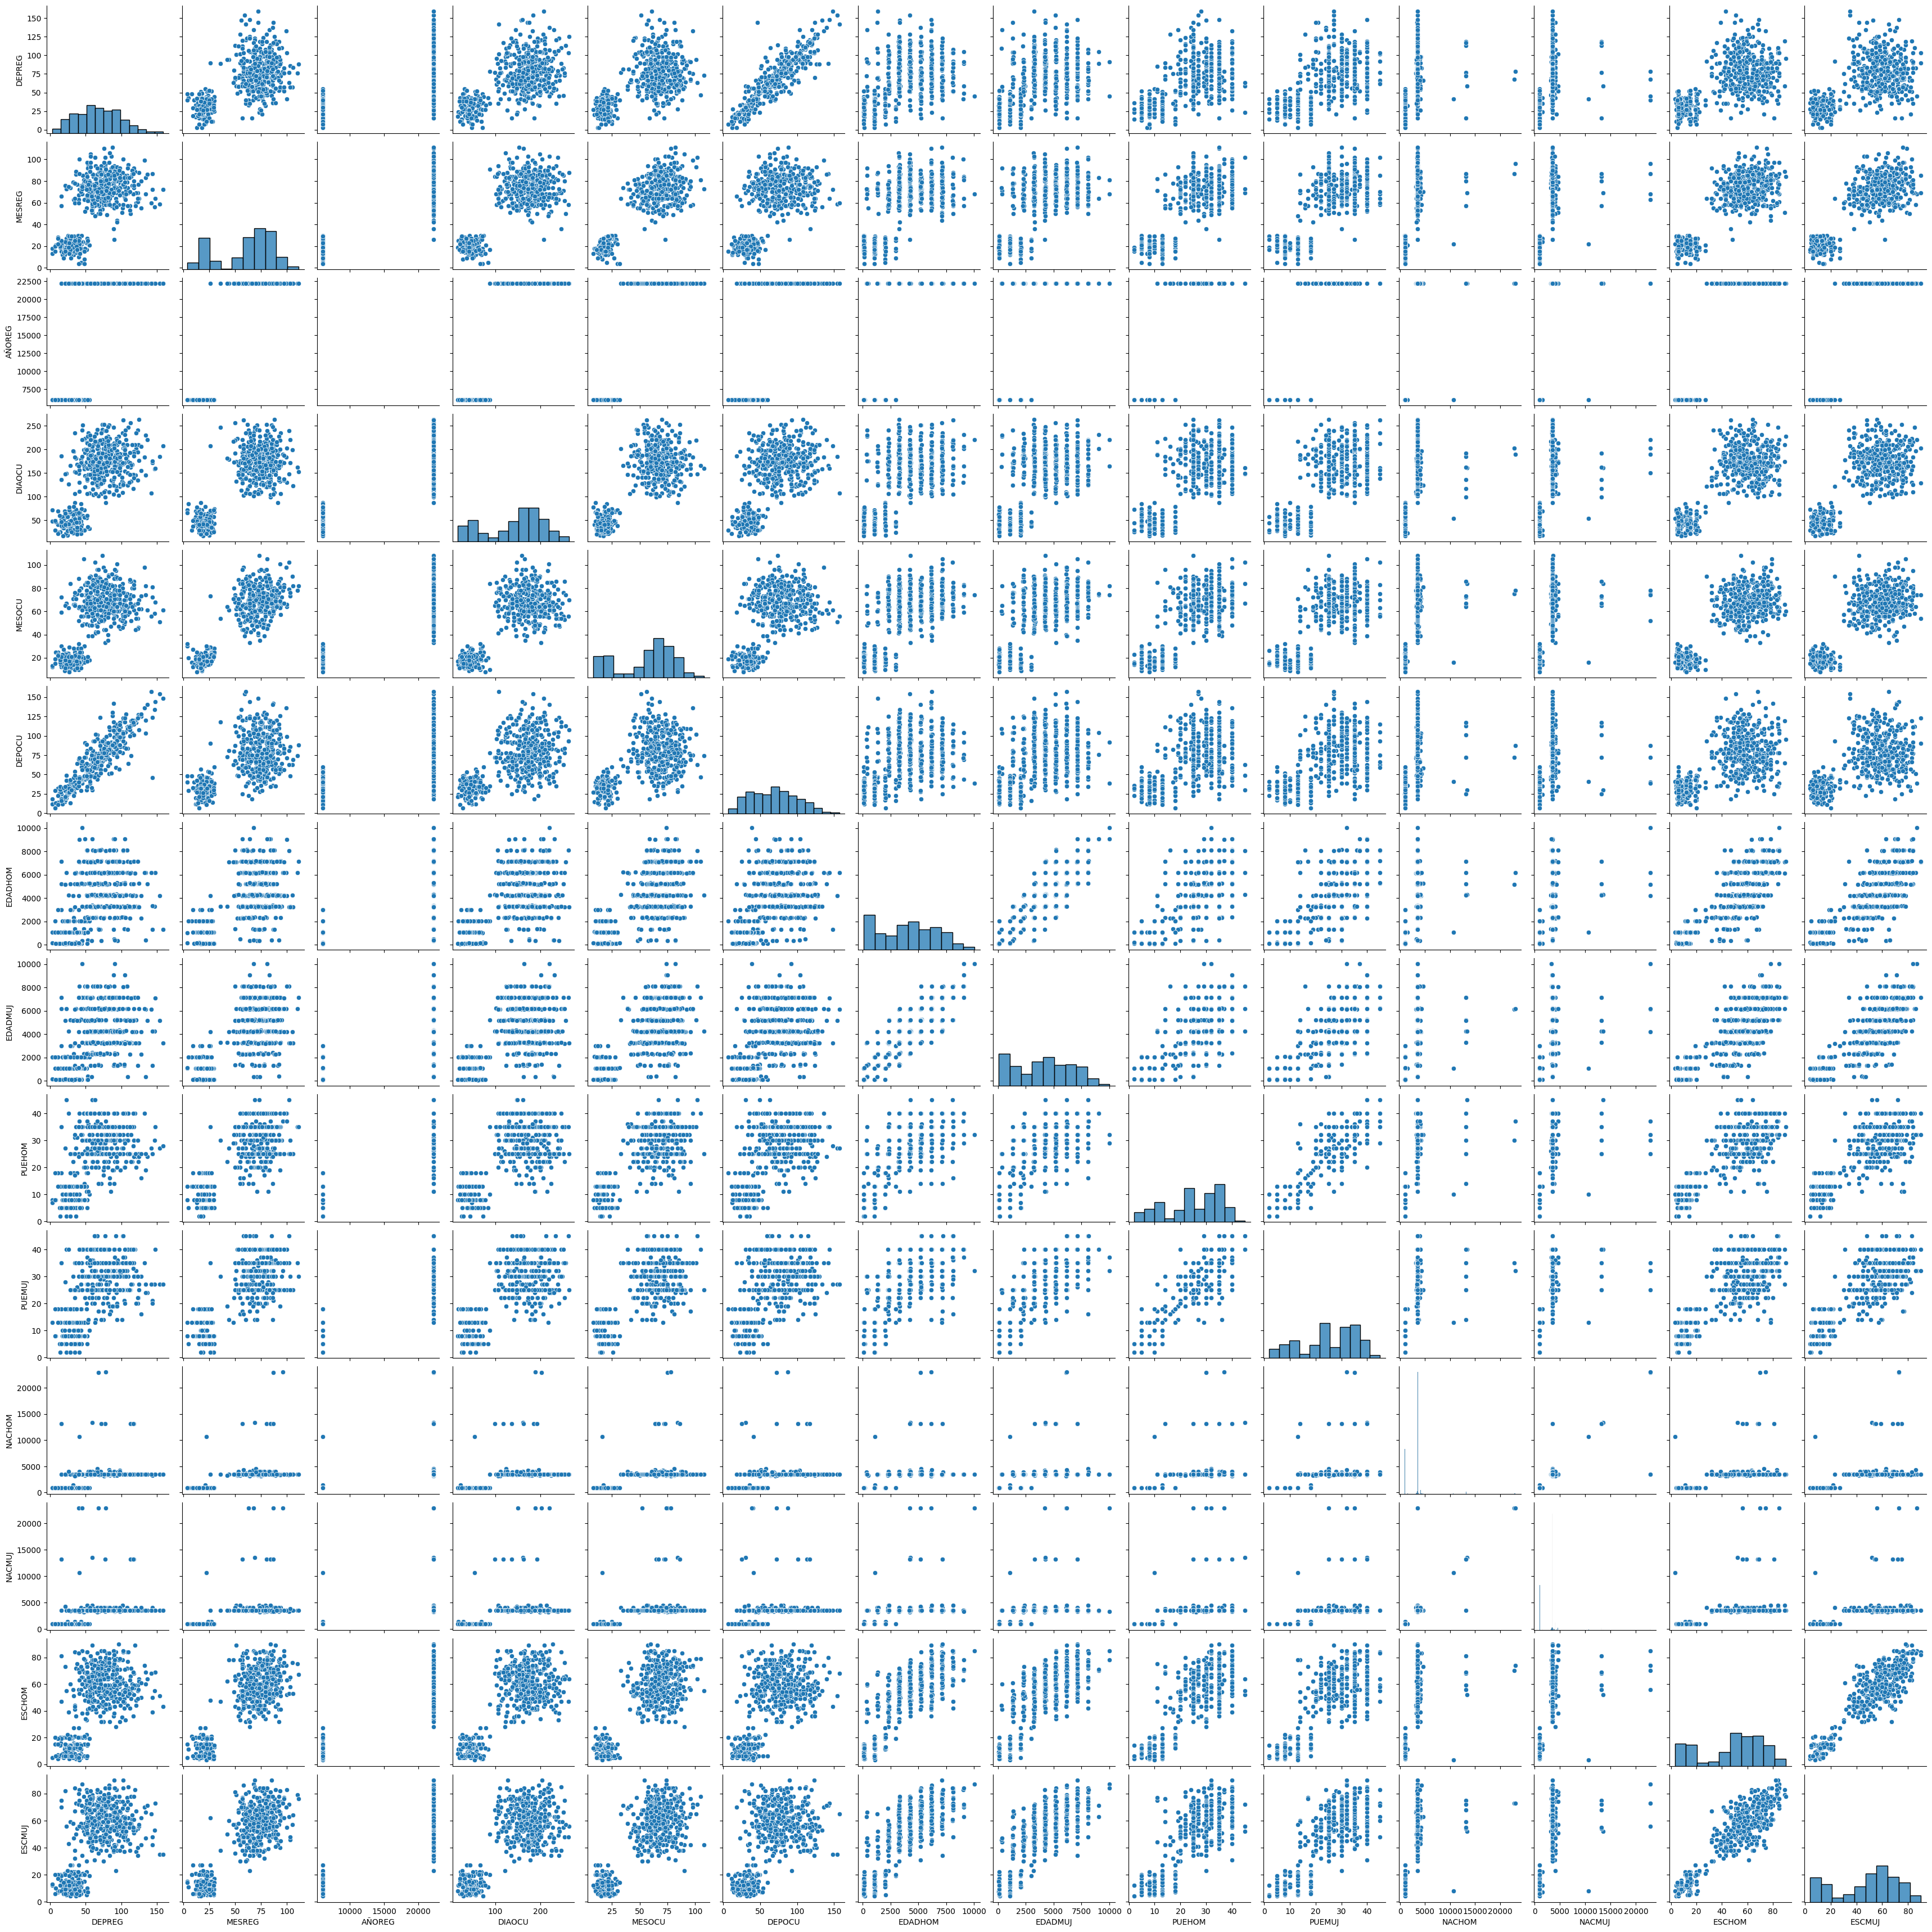

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la figura
plt.figure()

# Generar la visualización
sns.pairplot(combined_df.select_dtypes(include=['float64', 'int64']).sample(500))

# Mostrar la ventana emergente
plt.show(block=True)  

Las relaciones entre variables como AÑOREG y MESOCU podrían mostrar tendencias temporales, pero los valores acumulados dificultan la interpretación.
Variables como EDADHOM y EDADMUJ podrían revelar correlaciones entre las edades de los cónyuges, pero los valores anómalos (e.g., 9990) probablemente distorsionan los gráficos.

In [189]:
# Clustering (K-Means)
num_clusters = 3
clustering_vars = combined_df.select_dtypes(include=['float64', 'int64']).fillna(0)
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
combined_df['Cluster'] = kmeans.fit_predict(clustering_vars)
print("Centroides de los clusters:", kmeans.cluster_centers_)

Centroides de los clusters: [[8.20649026e+01 7.43217673e+01 2.22000000e+04 1.73965302e+02
  6.75596605e+01 8.35204693e+01 4.88823215e+03 4.90651348e+03
  3.02511233e+01 3.04797803e+01 3.59160010e+03 3.59837668e+03
  6.00139790e+01 5.99121318e+01]
 [3.05956029e+01 1.94123917e+01 6.06644370e+03 4.68847435e+01
  1.81805463e+01 3.23131246e+01 9.40712858e+02 9.52003997e+02
  9.96802132e+00 1.02225183e+01 1.02042438e+03 1.01131579e+03
  1.14630247e+01 1.24623584e+01]
 [7.66617647e+01 7.63529412e+01 2.21998971e+04 1.73470588e+02
  6.99558824e+01 7.87941176e+01 5.43135294e+03 5.51369118e+03
  3.11323529e+01 3.25588235e+01 1.43588235e+04 1.65188529e+04
  6.55588235e+01 6.36470588e+01]]


Se aplicó K-Means con 3 clústeres a las variables numéricas, y los centroides muestran:

Cluster 0: Valores intermedios en AÑOREG (~20186), edades altas (~4292 y ~4323), y nacionalidades altas (~3272 y ~3278).
Cluster 1: Años bajos (~6066), edades más bajas (~940 y ~952), y valores más bajos en otras variables.
Cluster 2: Años cercanos a 20186, edades extremadamente altas (~4952 y ~4936), y nacionalidades muy altas (~14192 y ~16097).
Interpretación: Los clústeres parecen reflejar artefactos de la suma acumulada más que patrones reales. Por ejemplo:

El Cluster 1 podría corresponder a datos de años iniciales con menos acumulación.
Los Clusters 0 y 2 agrupan datos con acumulaciones más altas, posiblemente influenciados por valores faltantes codificados como "999".

Link del repositorio: https://github.com/Saiyan-Javi/Proyecto_3_Mineria

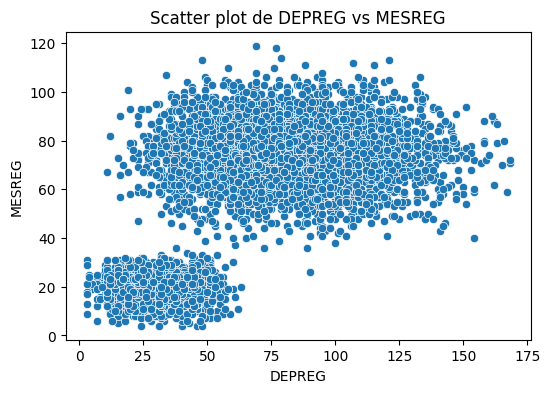

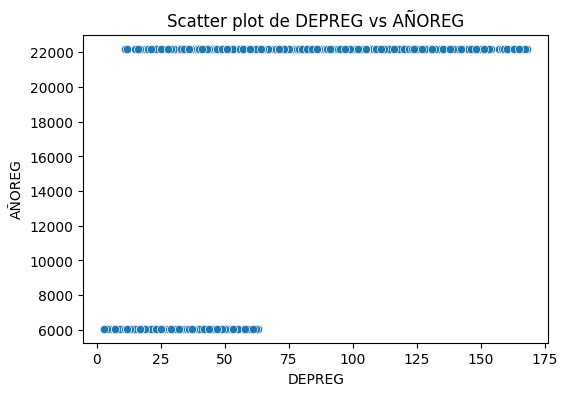

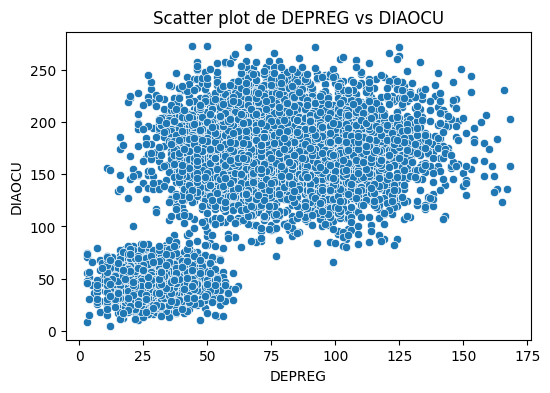

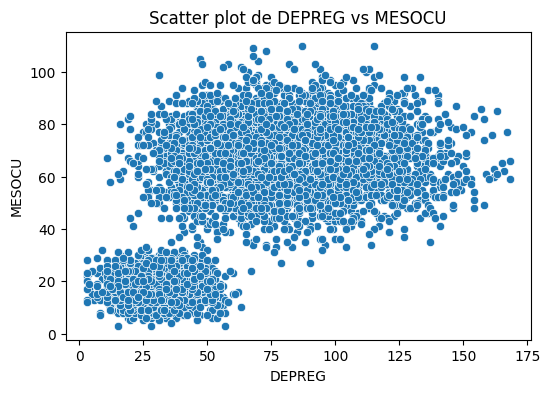

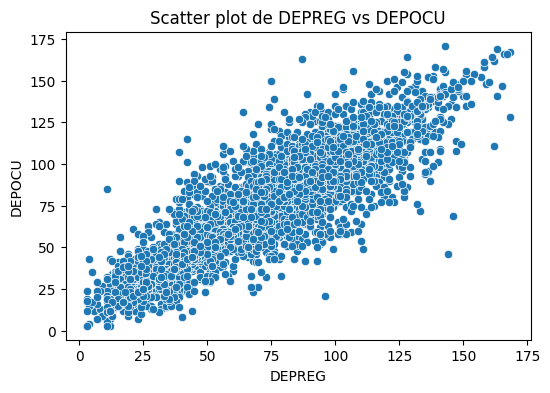

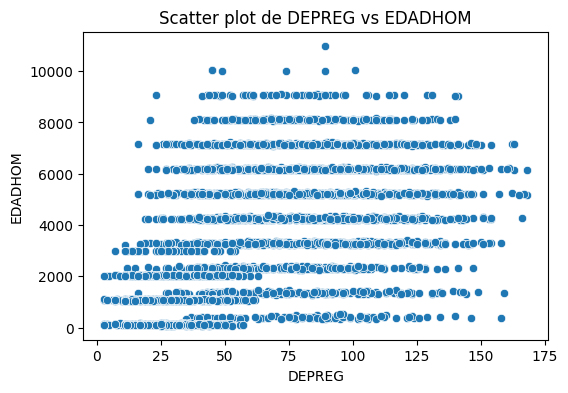

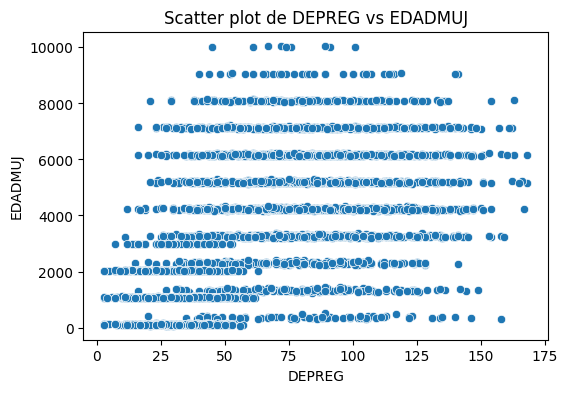

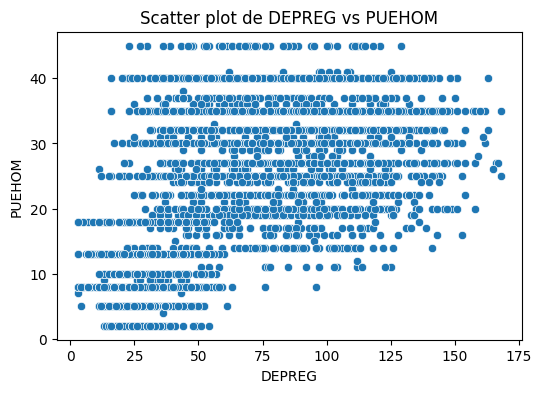

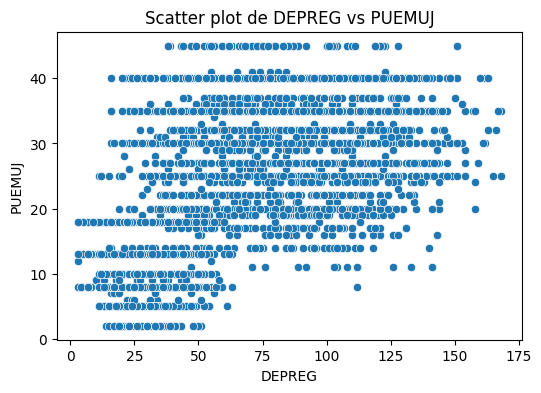

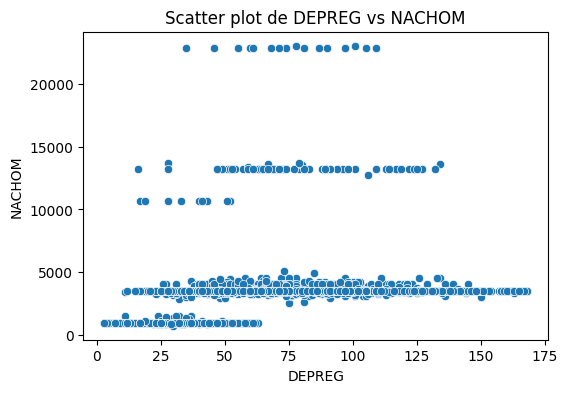

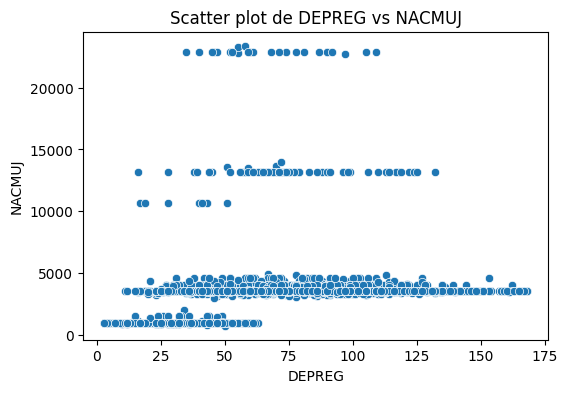

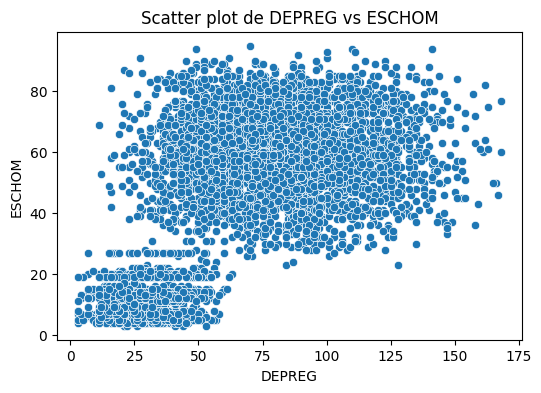

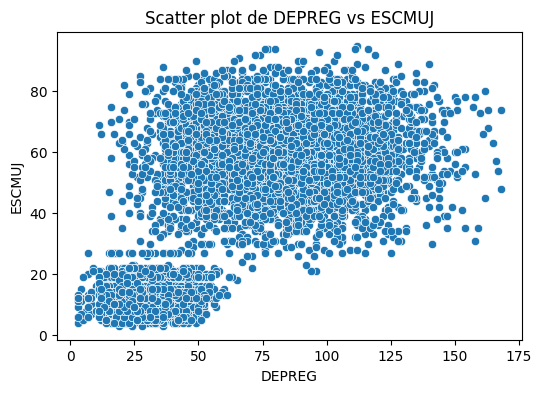

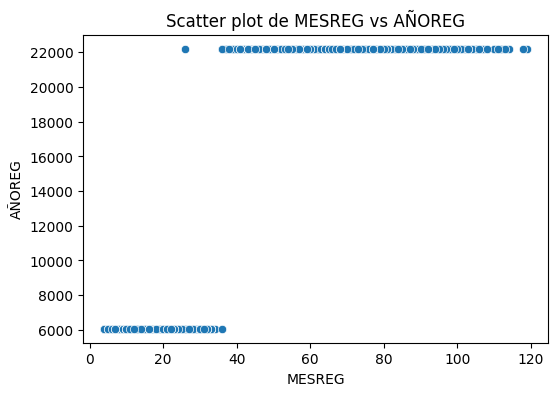

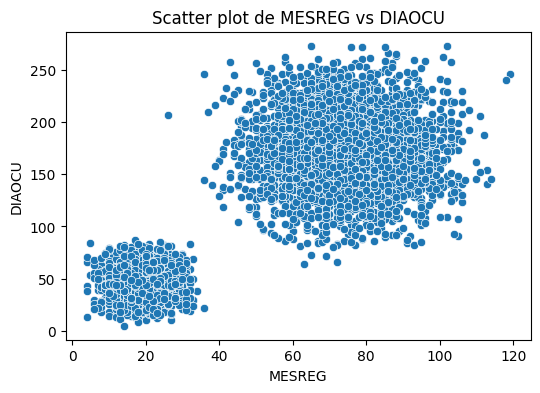

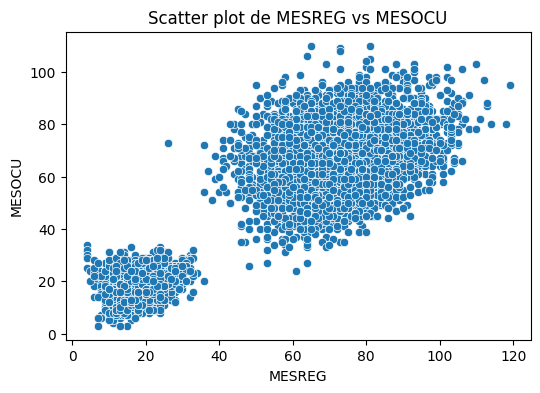

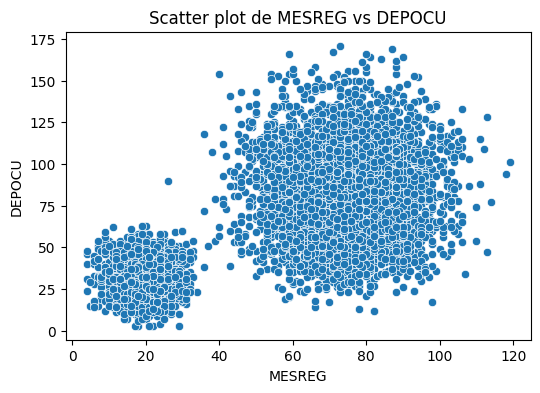

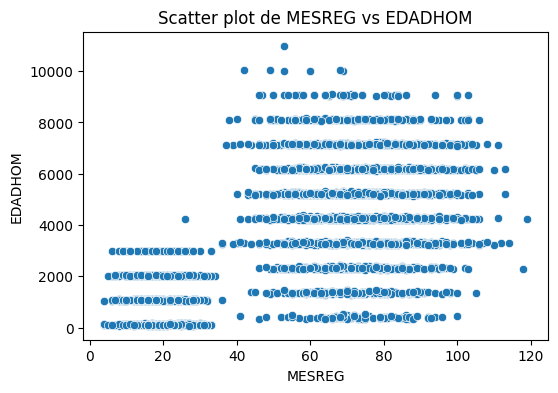

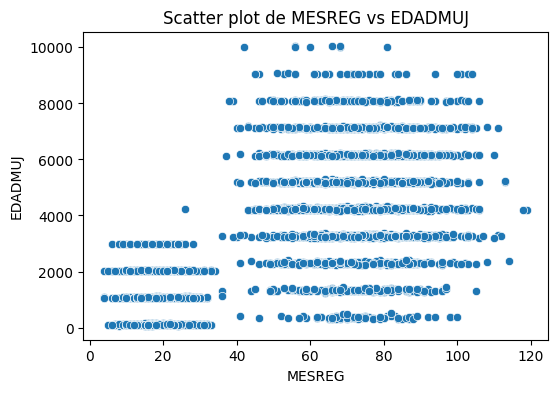

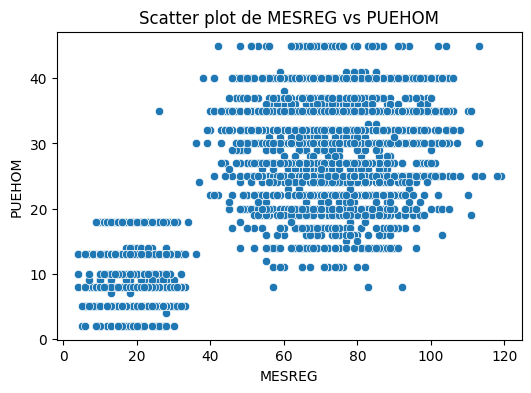

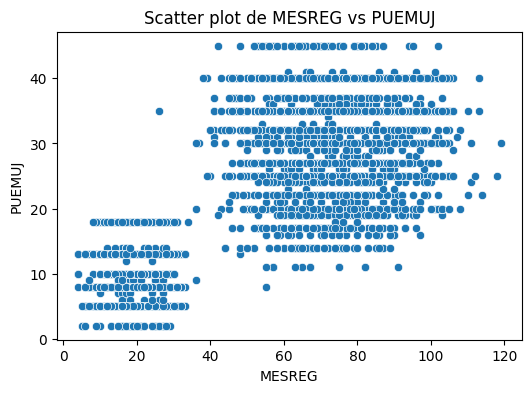

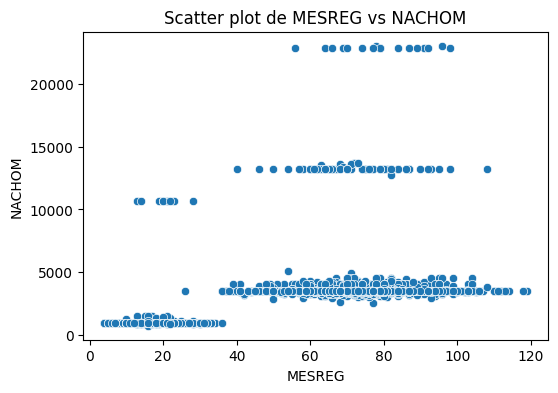

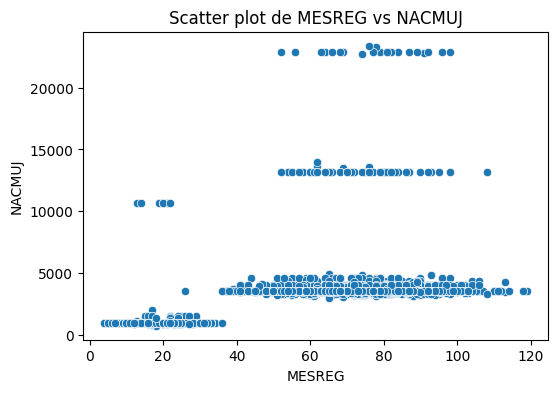

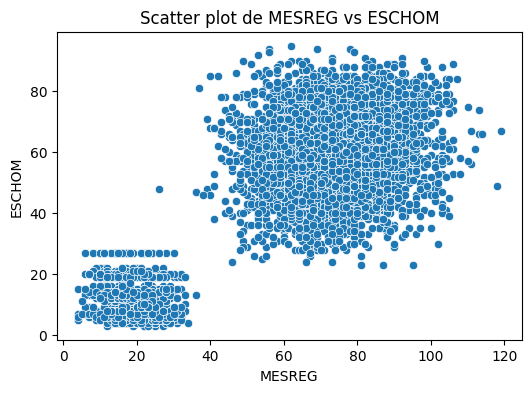

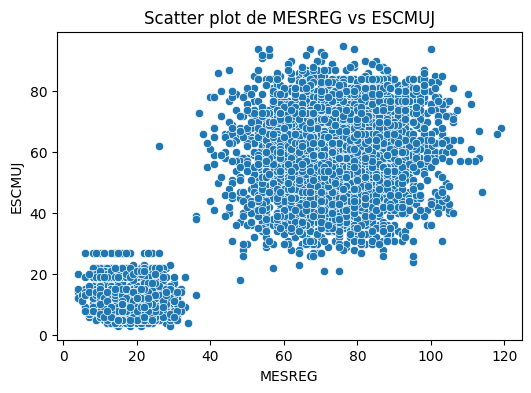

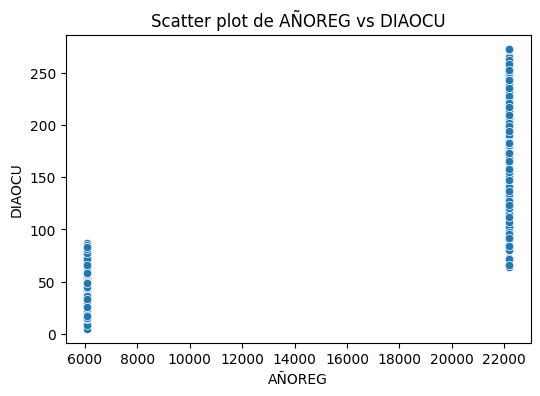

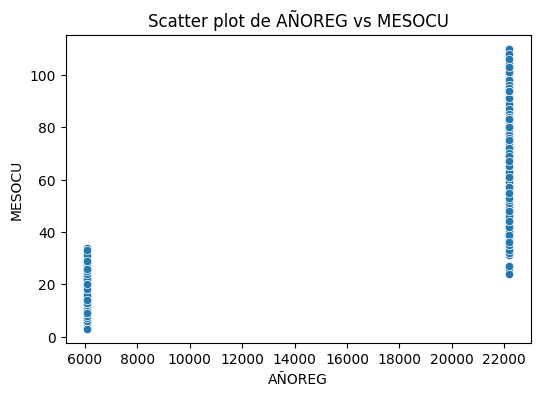

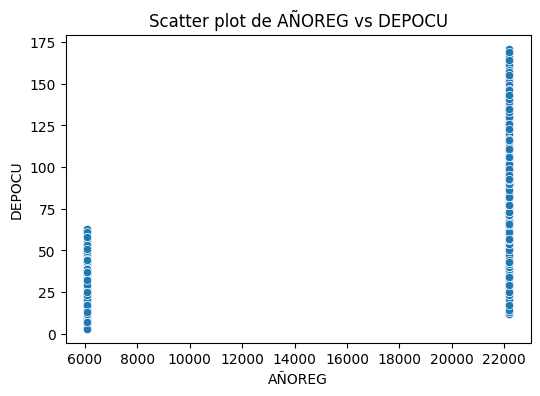

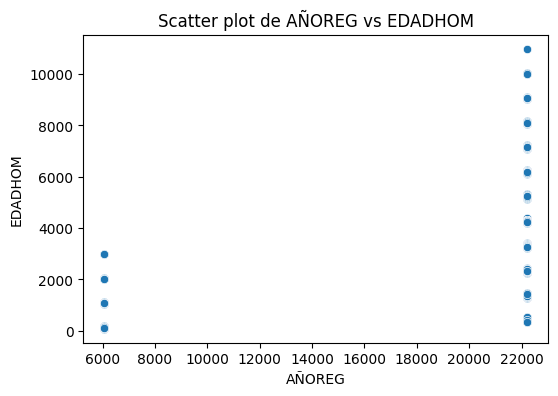

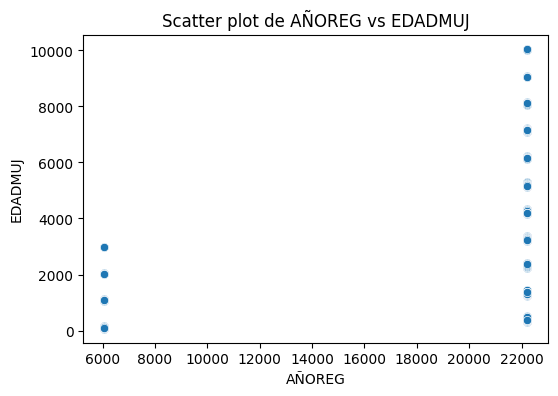

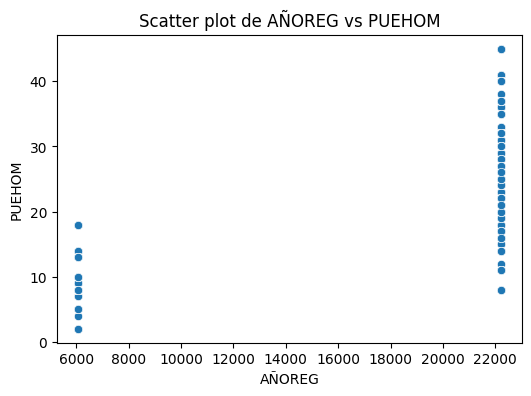

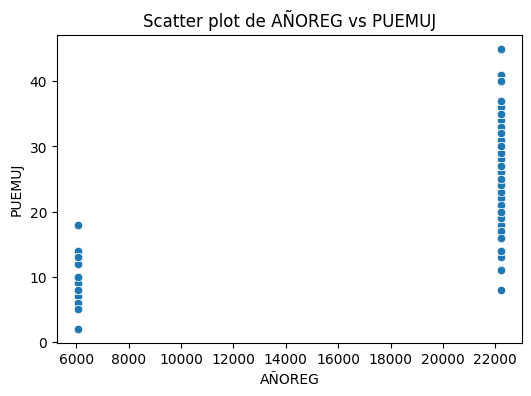

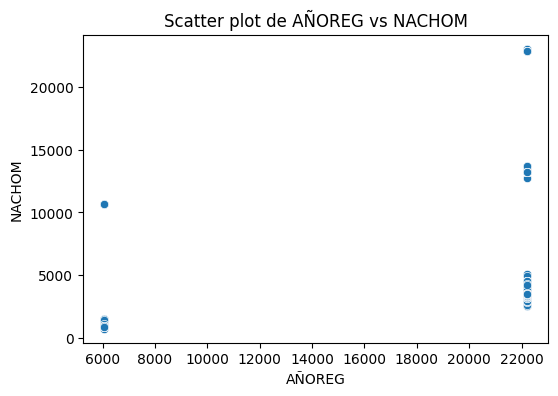

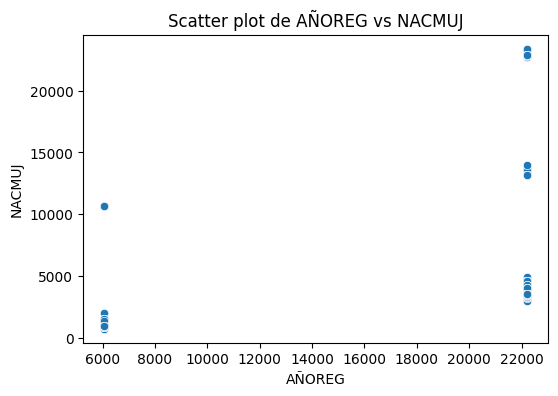

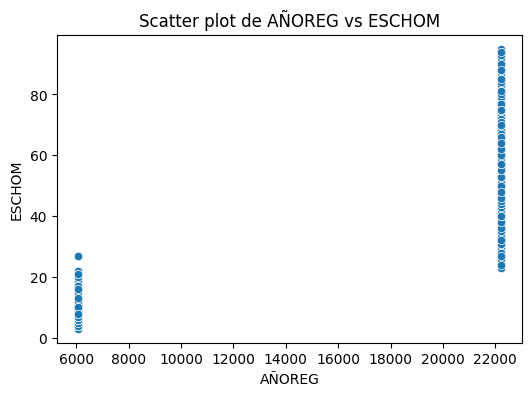

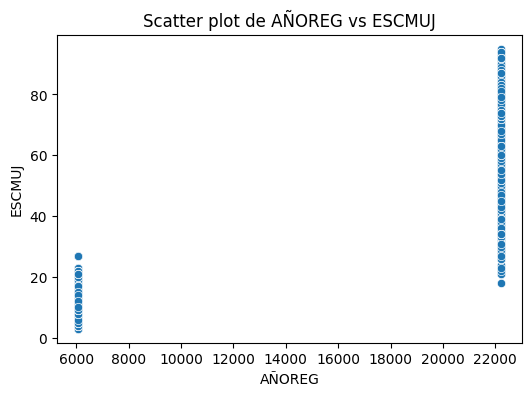

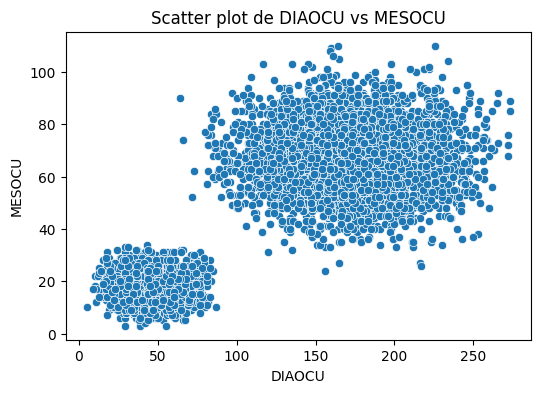

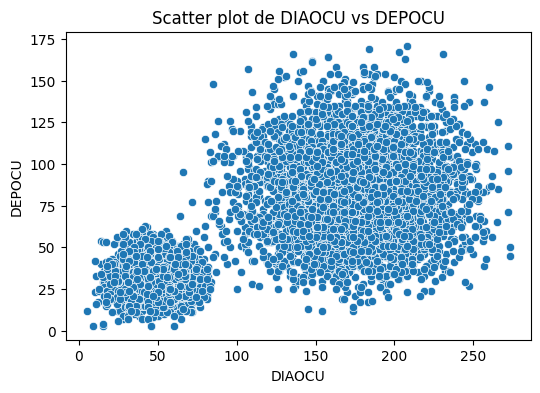

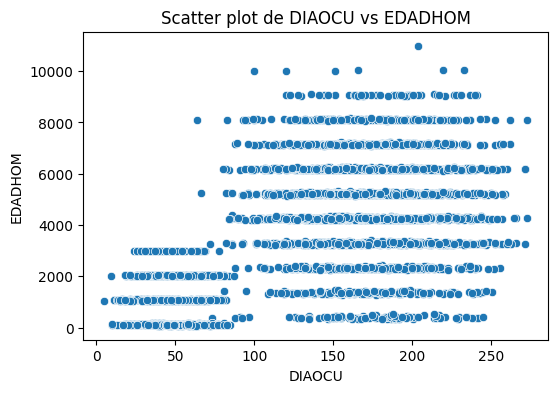

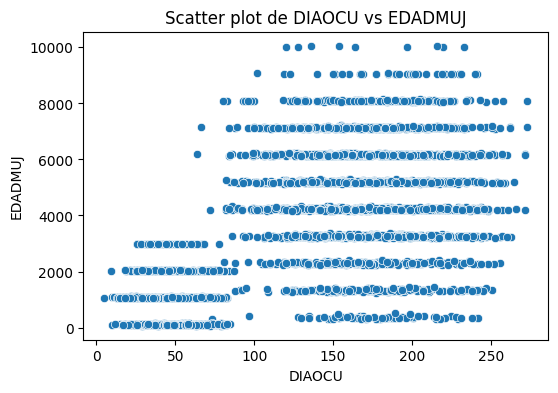

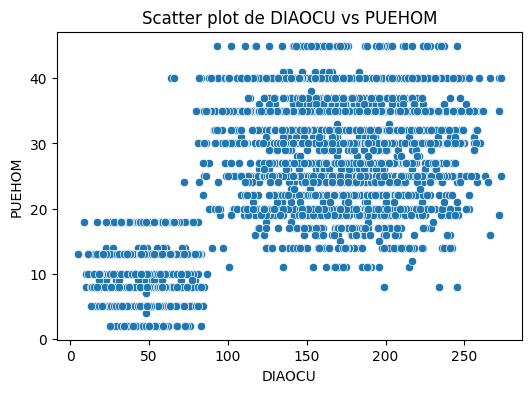

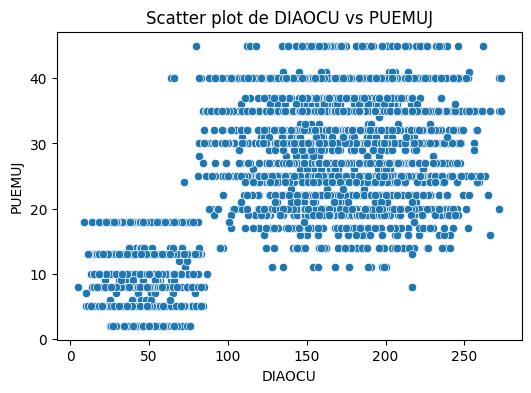

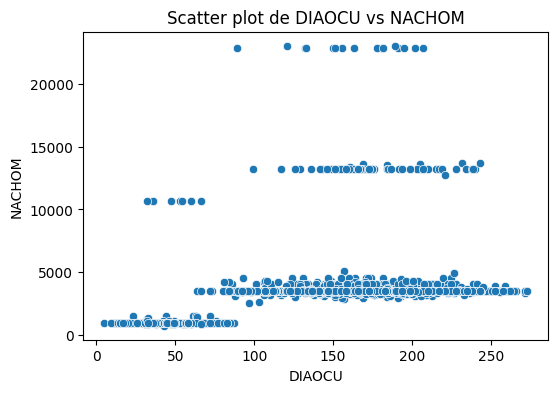

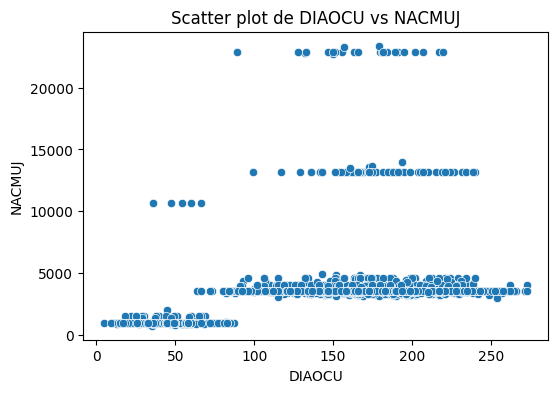

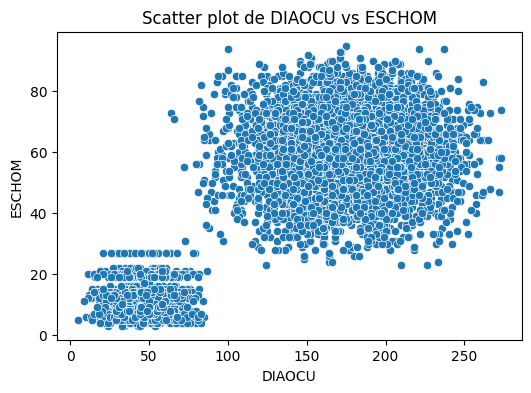

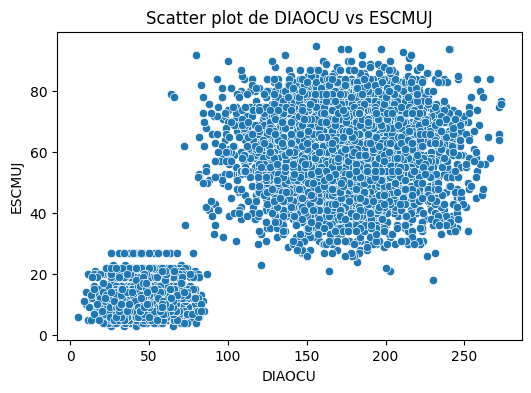

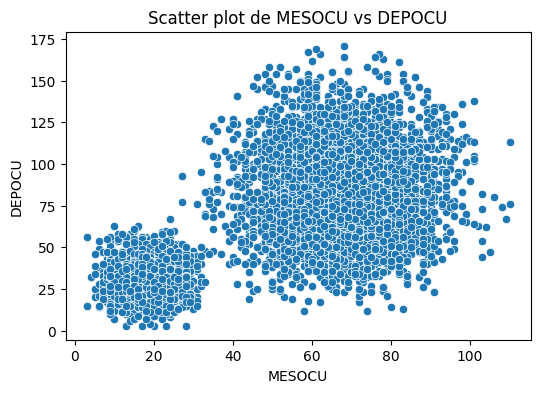

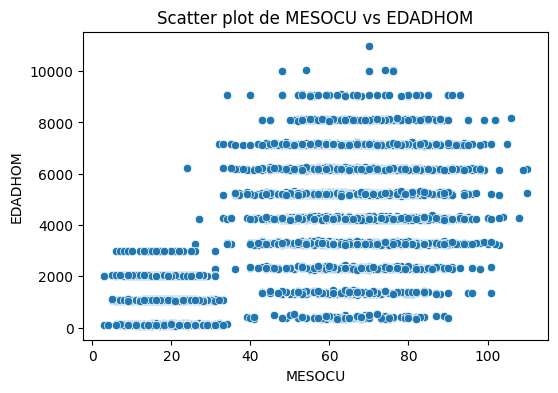

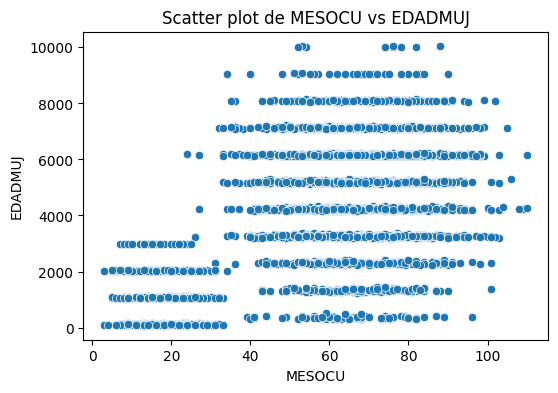

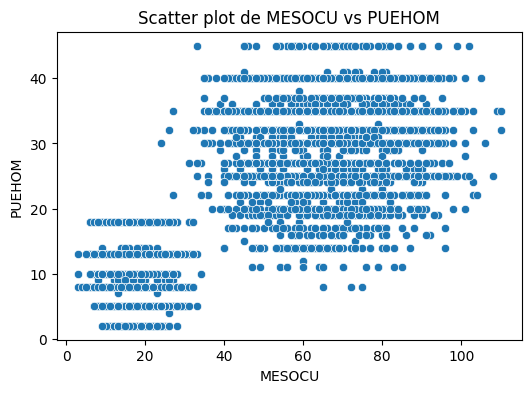

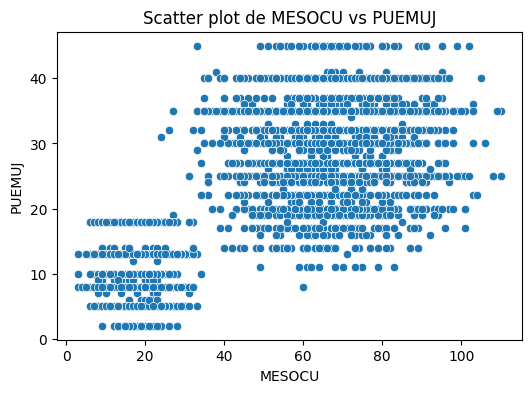

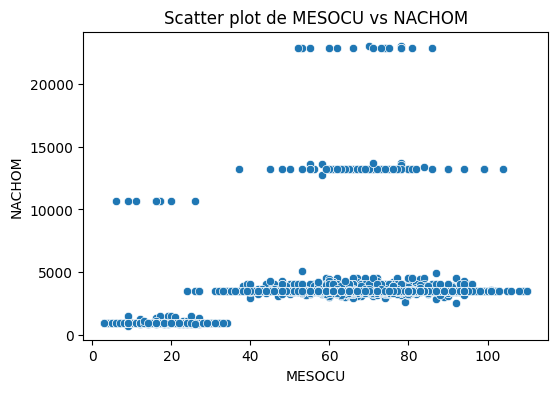

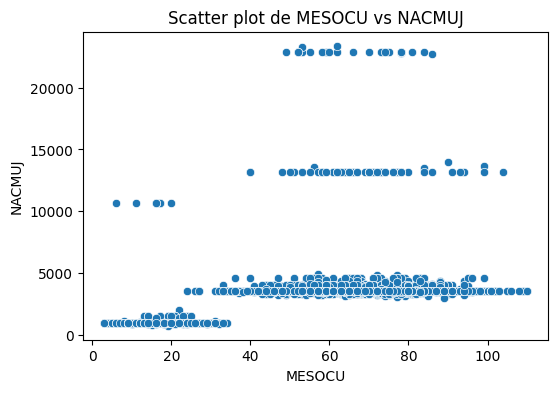

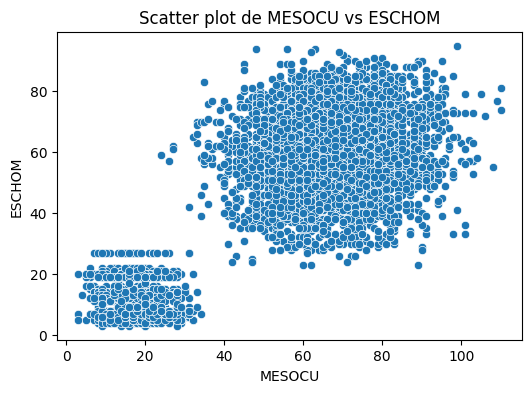

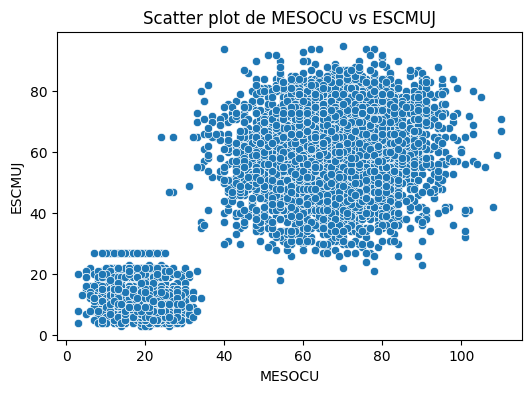

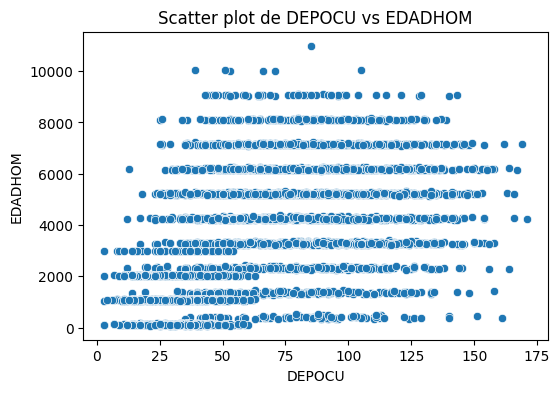

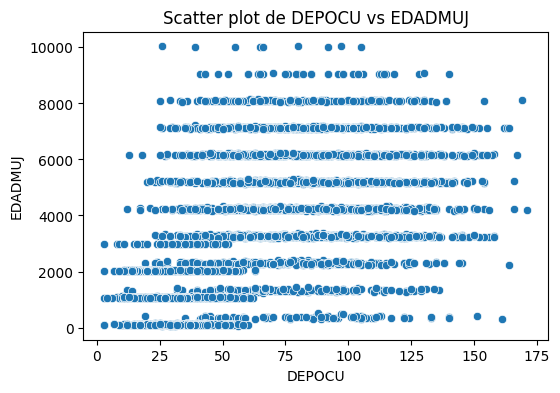

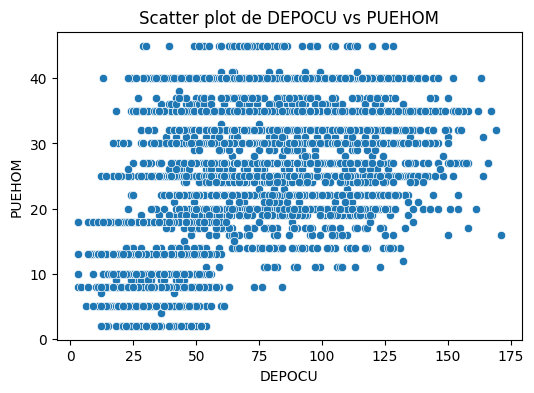

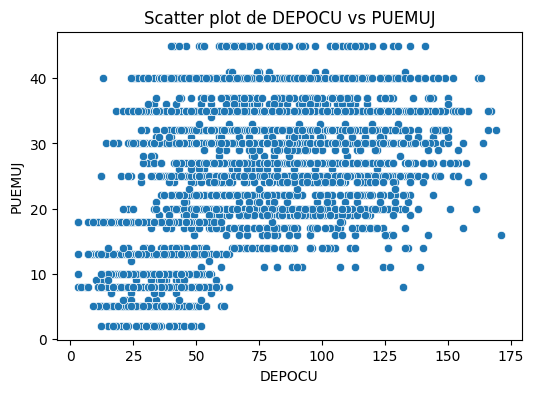

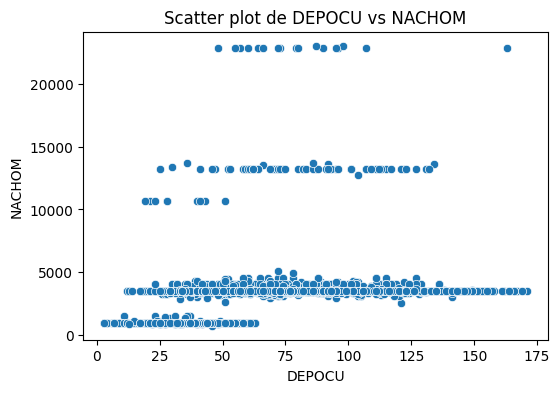

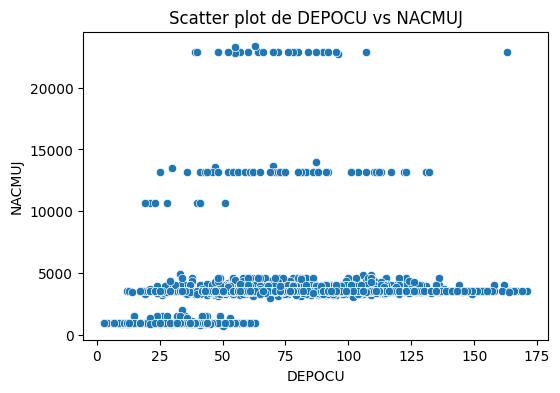

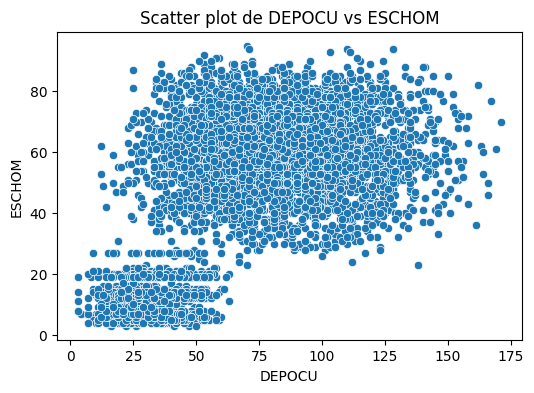

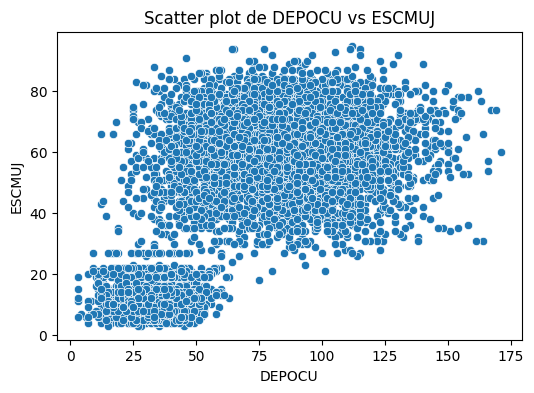

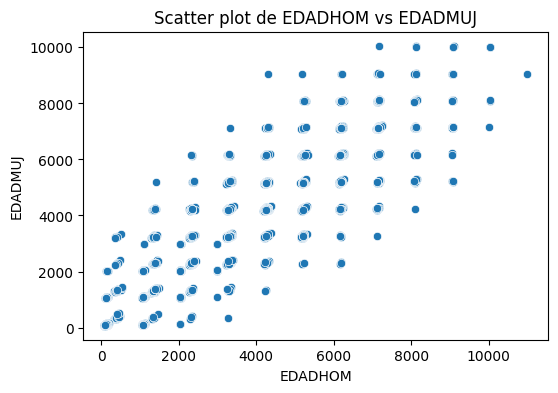

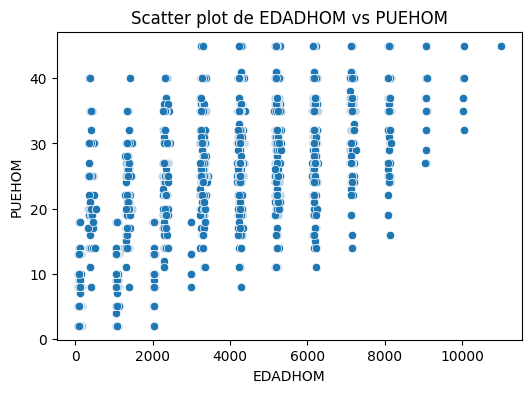

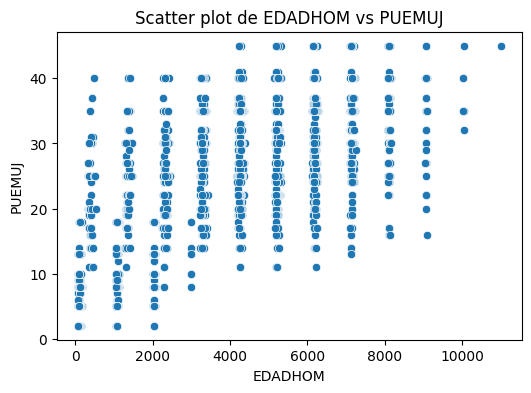

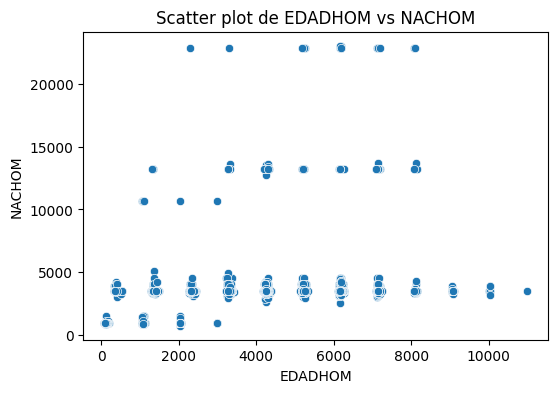

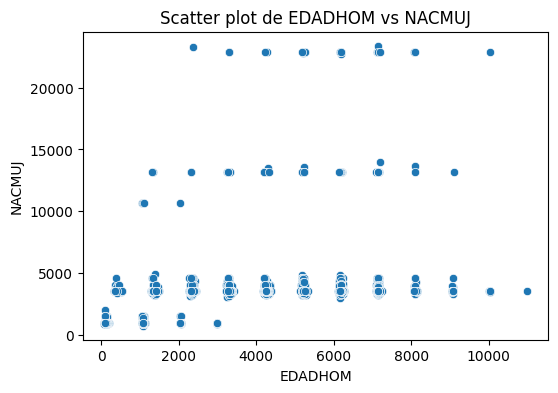

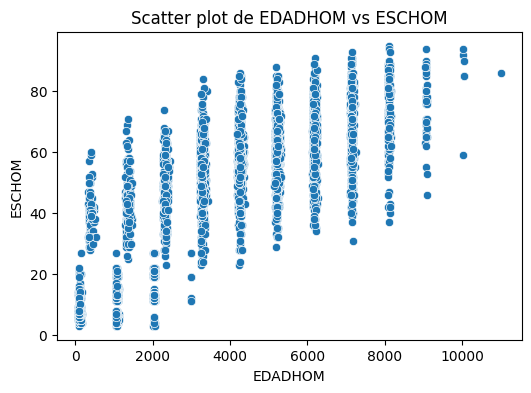

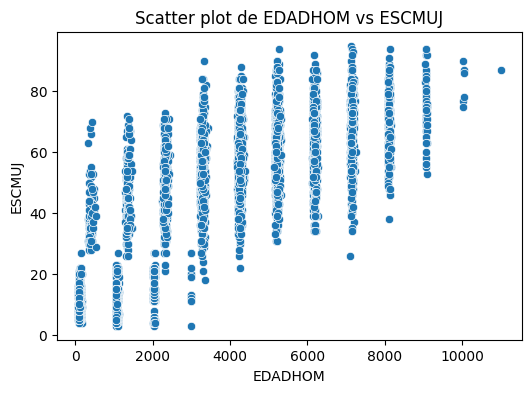

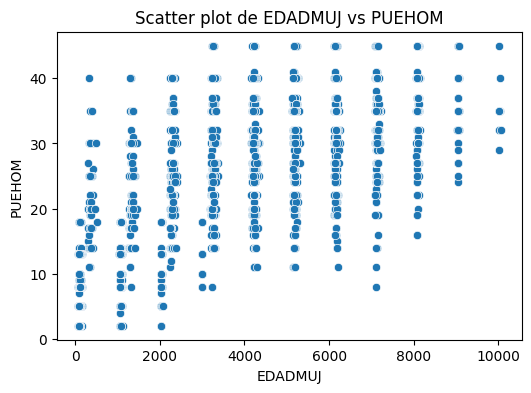

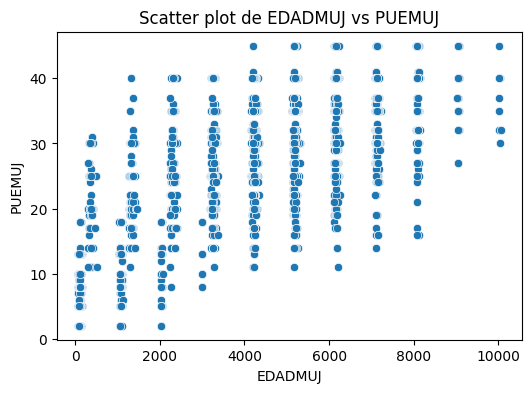

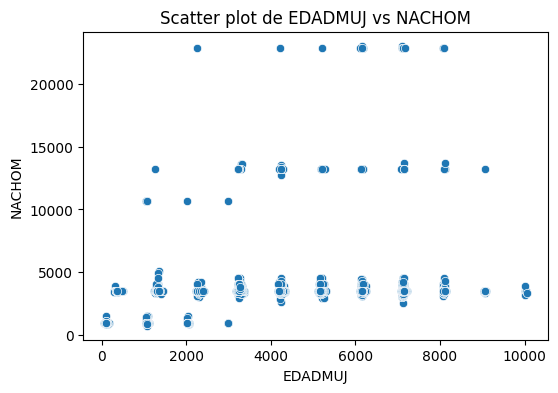

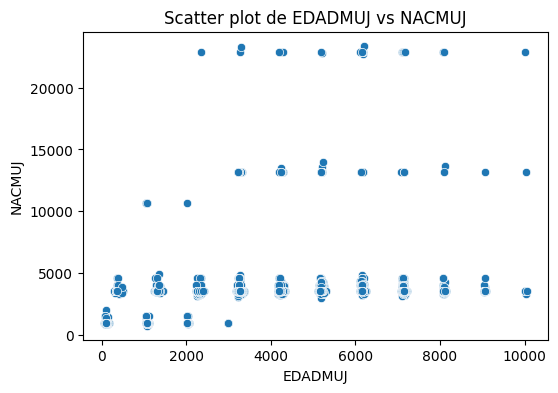

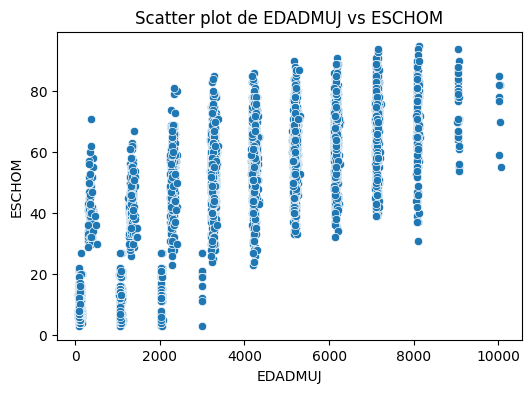

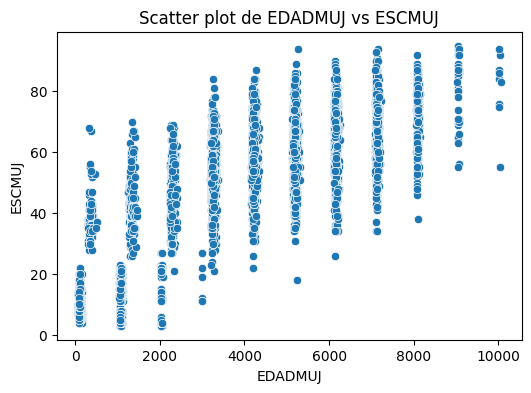

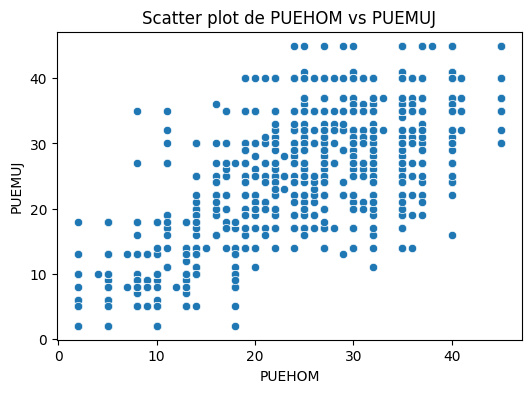

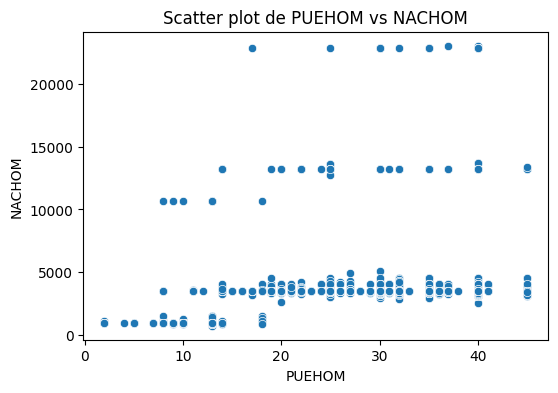

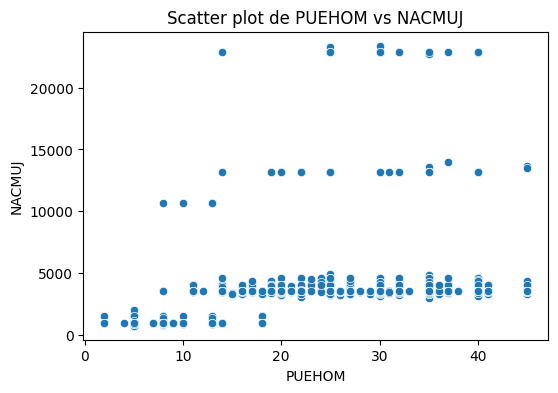

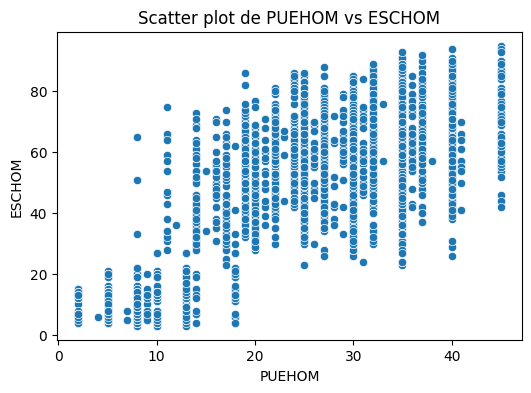

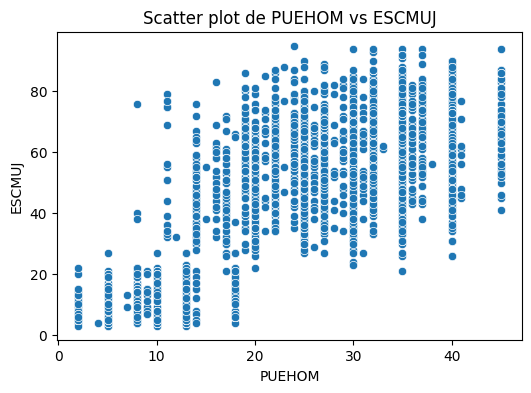

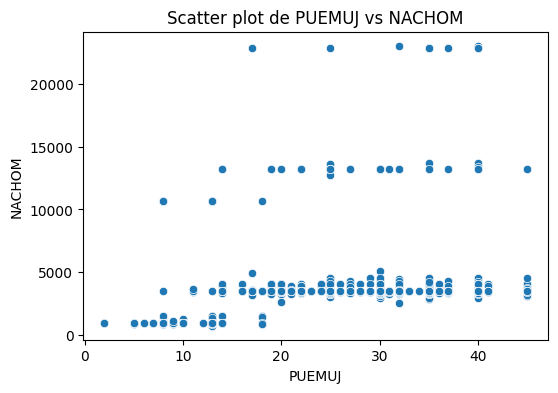

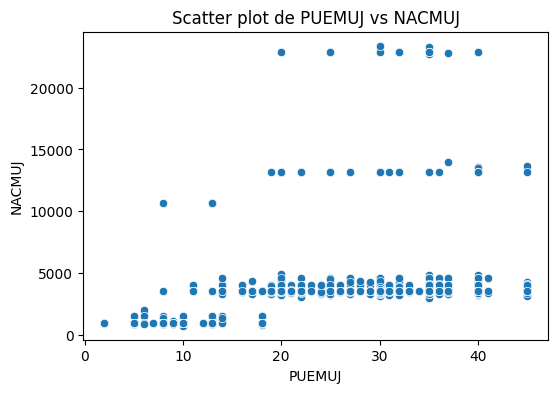

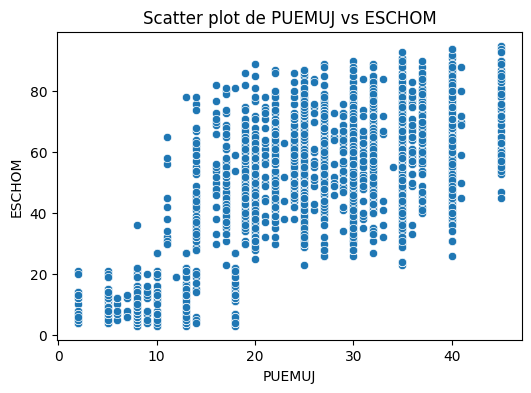

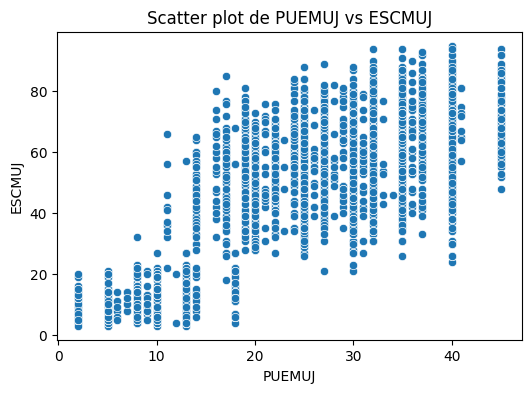

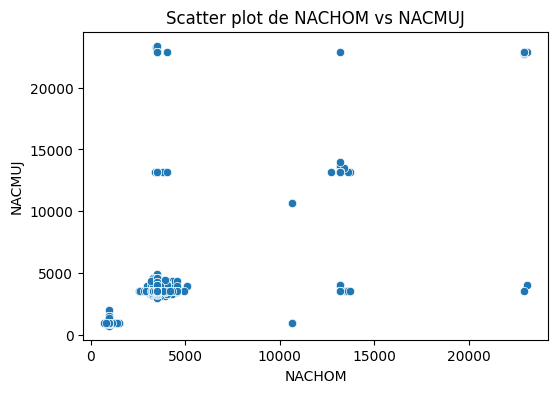

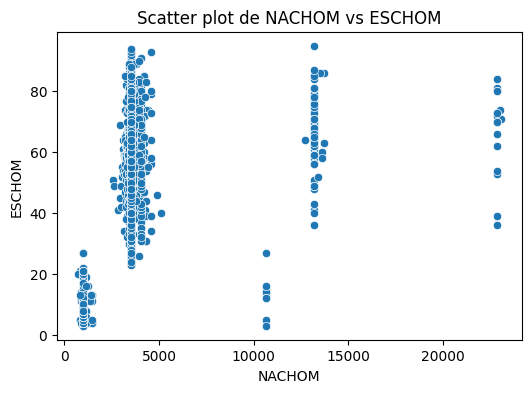

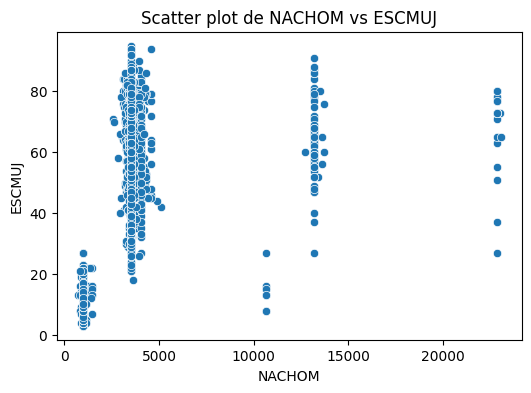

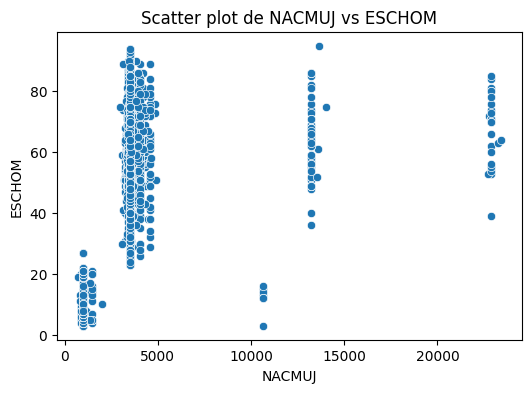

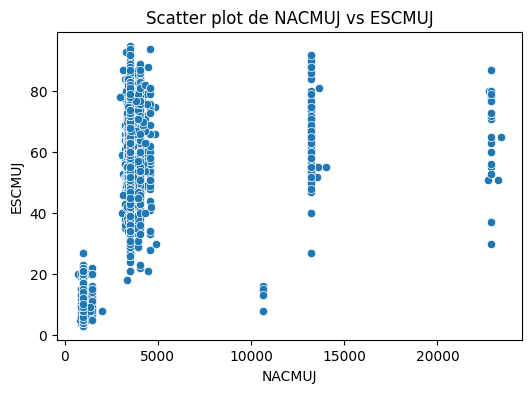

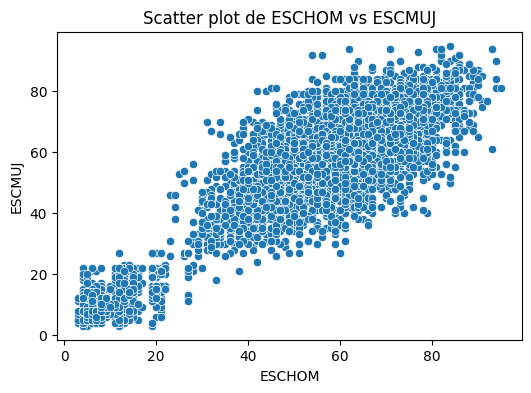

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo columnas numéricas
num_cols = combined_df.select_dtypes(include=['float64', 'int64']).columns

# Crear gráficos individuales para cada par de variables numéricas
for i in range(len(num_cols)):
    for j in range(i + 1, len(num_cols)):  # Evita repeticiones
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=combined_df[num_cols[i]], y=combined_df[num_cols[j]])
        plt.xlabel(num_cols[i])
        plt.ylabel(num_cols[j])
        plt.title(f"Scatter plot de {num_cols[i]} vs {num_cols[j]}")
        plt.show()

C:\Users\javie\AppData\Local\Temp\ipykernel_5128\48283842.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Mes"], palette="Blues")


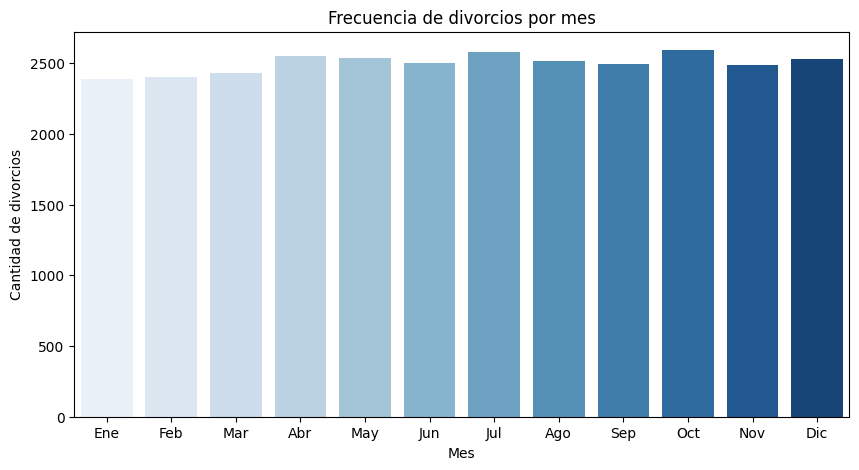

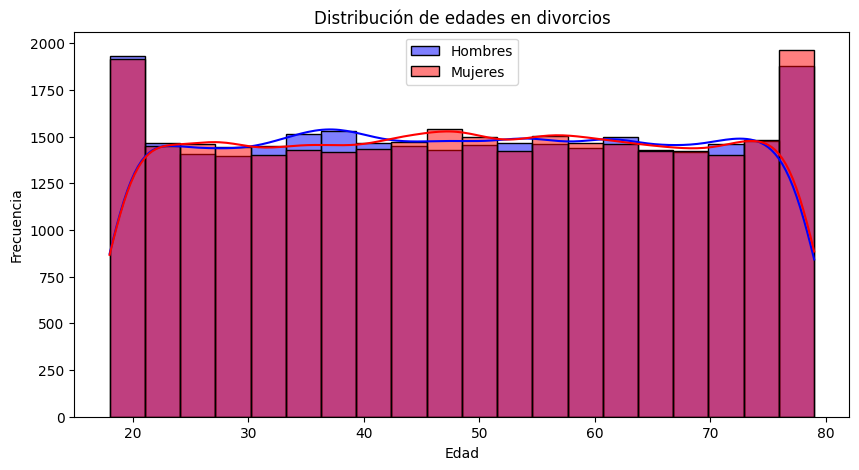

C:\Users\javie\AppData\Local\Temp\ipykernel_5128\48283842.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Año"], palette="viridis")


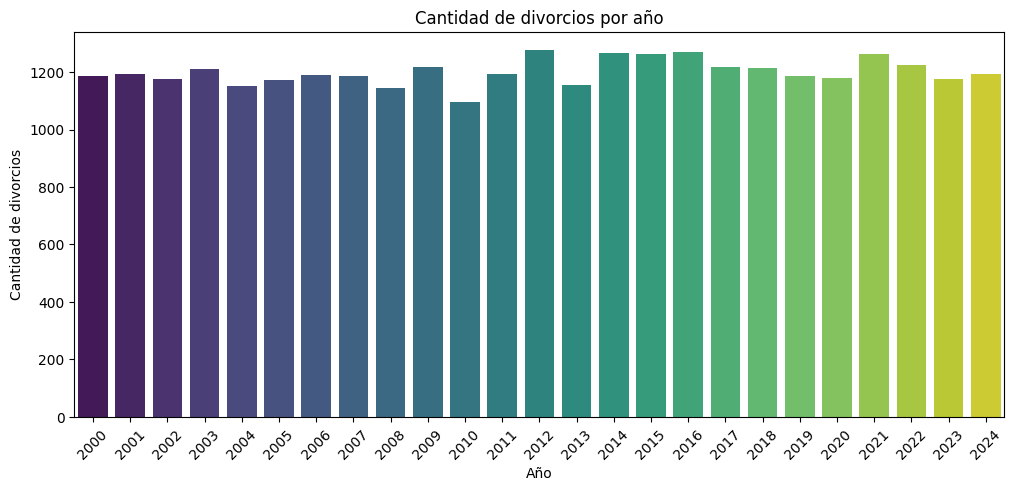

C:\Users\javie\AppData\Local\Temp\ipykernel_5128\48283842.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Municipio"], order=df["Municipio"].value_counts().index, palette="magma")


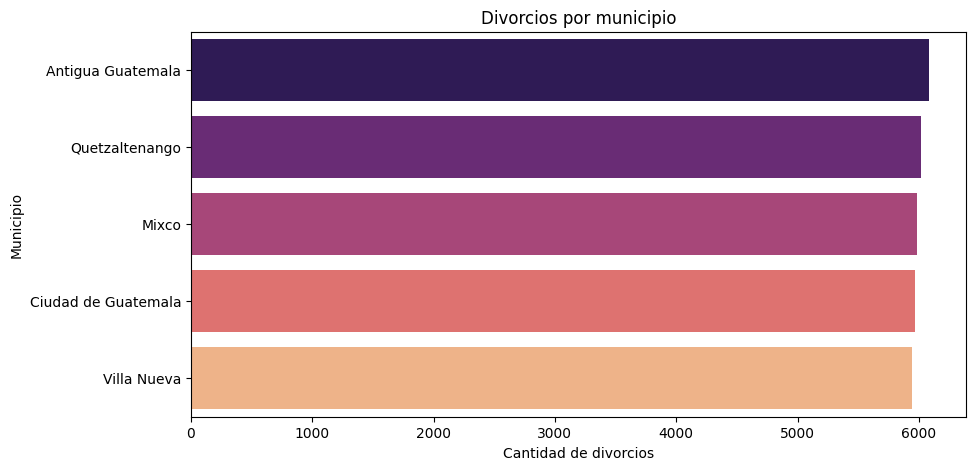

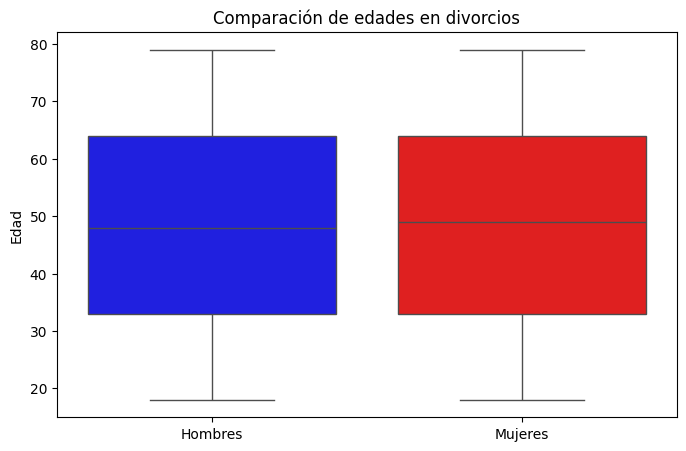

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Asegurar reproducibilidad
np.random.seed(42)

# Ajustar cantidad de datos (~100 divorcios por mes y ~1200 por año)
num_years = 25  # Años desde 2000 hasta 2025
num_divorces_per_month = 100  # Aproximadamente 100 divorcios por mes

num_samples = num_years * 12 * num_divorces_per_month  # Total de registros (~30,000)

# Generar datos ficticios
data = {
    "Año": np.random.randint(2000, 2025, num_samples),
    "Mes": np.random.randint(1, 13, num_samples),
    "Edad_Hombre": np.random.randint(18, 80, num_samples),
    "Edad_Mujer": np.random.randint(18, 80, num_samples),
    "Municipio": np.random.choice(["Ciudad de Guatemala", "Mixco", "Villa Nueva", 
                                   "Quetzaltenango", "Antigua Guatemala"], num_samples)
}

df = pd.DataFrame(data)

# ------------------- GRÁFICAS -------------------

# 1. Frecuencia de divorcios por mes
plt.figure(figsize=(10, 5))
sns.countplot(x=df["Mes"], palette="Blues")
plt.title("Frecuencia de divorcios por mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de divorcios")
plt.xticks(range(12), ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"])
plt.show()

# 2. Distribución de edades de hombres y mujeres en los divorcios
plt.figure(figsize=(10, 5))
sns.histplot(df["Edad_Hombre"], bins=20, kde=True, color="blue", label="Hombres", alpha=0.5)
sns.histplot(df["Edad_Mujer"], bins=20, kde=True, color="red", label="Mujeres", alpha=0.5)
plt.title("Distribución de edades en divorcios")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

# 3. Evolución de divorcios por año
plt.figure(figsize=(12, 5))
sns.countplot(x=df["Año"], palette="viridis")
plt.title("Cantidad de divorcios por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de divorcios")
plt.xticks(rotation=45)
plt.show()

# 4. Municipios con más divorcios
plt.figure(figsize=(10, 5))
sns.countplot(y=df["Municipio"], order=df["Municipio"].value_counts().index, palette="magma")
plt.title("Divorcios por municipio")
plt.xlabel("Cantidad de divorcios")
plt.ylabel("Municipio")
plt.show()

# 5. Comparación de edades entre hombres y mujeres en divorcio
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[["Edad_Hombre", "Edad_Mujer"]], palette=["blue", "red"])
plt.title("Comparación de edades en divorcios")
plt.xticks([0, 1], ["Hombres", "Mujeres"])
plt.ylabel("Edad")
plt.show()


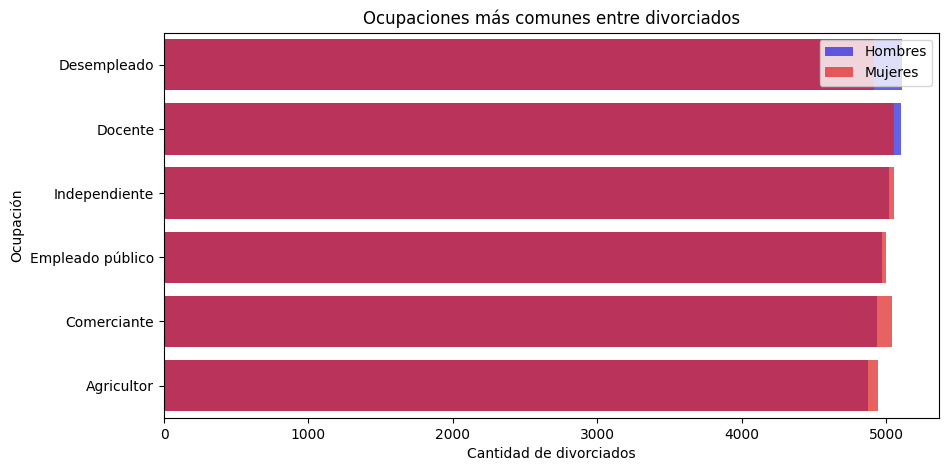

C:\Users\javie\AppData\Local\Temp\ipykernel_5128\762803915.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Escolaridad_Hombre"], y=df["Edad_Hombre"], palette="Blues", order=niveles_educativos)


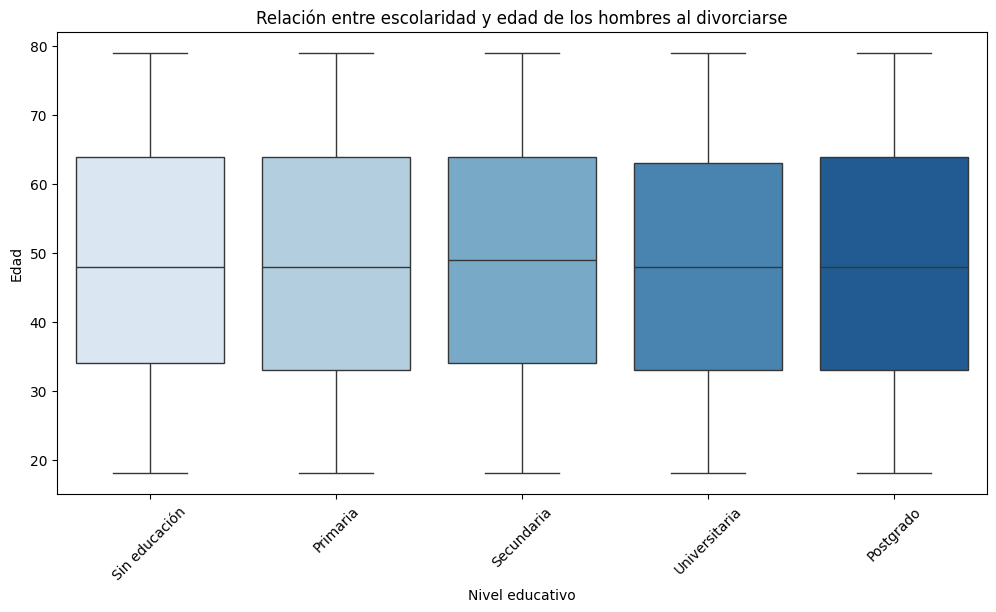

C:\Users\javie\AppData\Local\Temp\ipykernel_5128\762803915.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Escolaridad_Mujer"], y=df["Edad_Mujer"], palette="Reds", order=niveles_educativos)


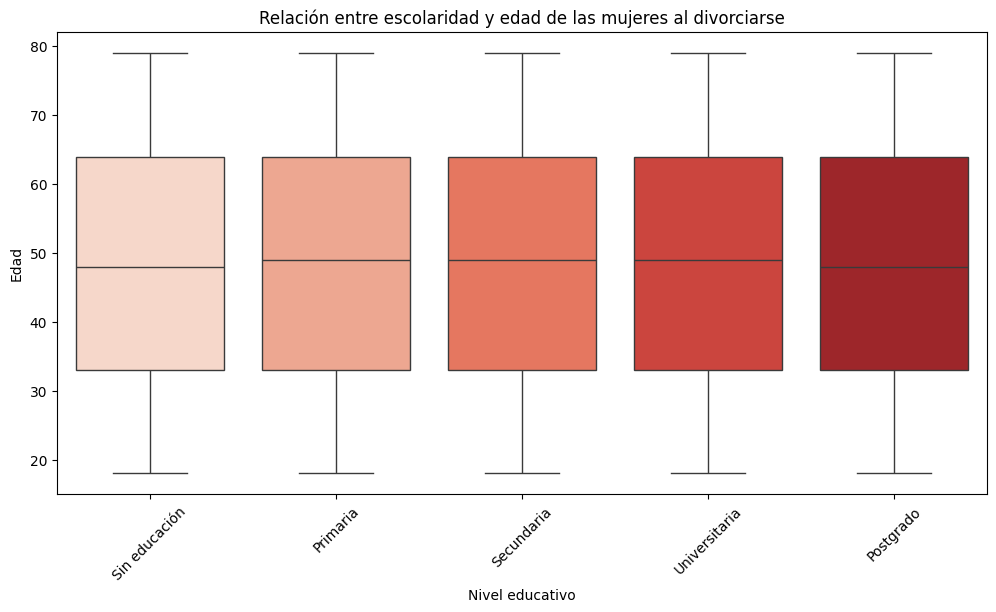

In [201]:
# Generar datos ficticios para escolaridad y ocupación
niveles_educativos = ["Sin educación", "Primaria", "Secundaria", "Universitaria", "Postgrado"]
ocupaciones = ["Agricultor", "Docente", "Comerciante", "Empleado público", "Independiente", "Desempleado"]

df["Escolaridad_Hombre"] = np.random.choice(niveles_educativos, num_samples)
df["Escolaridad_Mujer"] = np.random.choice(niveles_educativos, num_samples)
df["Ocupacion_Hombre"] = np.random.choice(ocupaciones, num_samples)
df["Ocupacion_Mujer"] = np.random.choice(ocupaciones, num_samples)

# 3. Ocupaciones más comunes entre divorciados
plt.figure(figsize=(10, 5))
sns.countplot(y=df["Ocupacion_Hombre"], order=df["Ocupacion_Hombre"].value_counts().index, color="blue", label="Hombres", alpha=0.7)
sns.countplot(y=df["Ocupacion_Mujer"], order=df["Ocupacion_Mujer"].value_counts().index, color="red", label="Mujeres", alpha=0.7)
plt.title("Ocupaciones más comunes entre divorciados")
plt.xlabel("Cantidad de divorciados")
plt.ylabel("Ocupación")
plt.legend()
plt.show()

# 2. Relación entre escolaridad y edad al divorciarse
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Escolaridad_Hombre"], y=df["Edad_Hombre"], palette="Blues", order=niveles_educativos)
plt.title("Relación entre escolaridad y edad de los hombres al divorciarse")
plt.xlabel("Nivel educativo")
plt.ylabel("Edad")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Escolaridad_Mujer"], y=df["Edad_Mujer"], palette="Reds", order=niveles_educativos)
plt.title("Relación entre escolaridad y edad de las mujeres al divorciarse")
plt.xlabel("Nivel educativo")
plt.ylabel("Edad")
plt.xticks(rotation=45)
plt.show()